# Análisis del Dataset Titanic
**Proyecto de Programación II - Ciencia de Datos**

## Objetivo
Realizar un análisis exploratorio completo del dataset Titanic utilizando Pandas

## 1. Carga de Datos


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [3]:
train = pd.read_csv('../data:/train.csv')
test = pd.read_csv('../data:/test.csv')

print("Datos cargados exitosamente")
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Datos cargados exitosamente
Train shape: (891, 12)
Test shape: (418, 11)


## 2. Descripción de Variables



In [4]:
print("COLUMNAS EN TRAIN:")
print(train.columns.tolist())
print("\nCOLUMNAS EN TEST:")
print(test.columns.tolist())

COLUMNAS EN TRAIN:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

COLUMNAS EN TEST:
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
print("PRIMERAS FILAS - TRAIN:")
train.head()

PRIMERAS FILAS - TRAIN:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("INFORMACION DEL DATASET:")
train.info()

INFORMACION DEL DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Descripción de Variables:

- **PassengerId**: Identificador único del pasajero (int)
- **Survived**: Variable objetivo - 0=No sobrevivió, 1=Sobrevivió (solo en train)
- **Pclass**: Clase del ticket (1=Primera, 2=Segunda, 3=Tercera)
- **Name**: Nombre completo del pasajero (incluye título)
- **Sex**: Sexo del pasajero (male/female)
- **Age**: Edad en años (puede tener valores faltantes)
- **SibSp**: Número de hermanos/cónyuges a bordo
- **Parch**: Número de padres/hijos a bordo
- **Ticket**: Número del ticket
- **Fare**: Tarifa pagada en libras esterlinas
- **Cabin**: Número de cabina (muchos valores faltantes)
- **Embarked**: Puerto de embarque (C=Cherbourg, Q=Queenstown, S=Southampton)

## 3. Estadísticas Básicas

In [7]:
print("ESTADISTICAS DESCRIPTIVAS - TRAIN:")
train.describe()

ESTADISTICAS DESCRIPTIVAS - TRAIN:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print("ESTADISTICAS DESCRIPTIVAS - TEST:")
test.describe()

ESTADISTICAS DESCRIPTIVAS - TEST:


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
comparacion = pd.DataFrame({
    'Train': train.describe().loc['mean'],
    'Test': test.describe().loc['mean']
})
comparacion['Diferencia %'] = ((comparacion['Test'] - comparacion['Train']) / comparacion['Train'] * 100).round(2)
print("COMPARACION TRAIN VS TEST (Medias):")
comparacion

COMPARACION TRAIN VS TEST (Medias):


,Train,Test,Diferencia %
Age,29.699118,30.272590,1.93
Fare,32.204208,35.627188,10.63
Parch,0.381594,0.392344,2.82
PassengerId,446.000000,1100.500000,146.75
Pclass,2.308642,2.265550,-1.87
SibSp,0.523008,0.447368,-14.46
Survived,0.383838,NaN,NaN


## 4. Creación de Variable 'Familiares'

Vamos a crear una nueva variable que combine el número de hermanos/cónyuges (SibSp) y padres/hijos (Parch) para saber cuántos familiares tenía cada pasajero a bordo.

In [10]:
# Crear variable Familiares
train['Familiares'] = train['SibSp'] + train['Parch']
test['Familiares'] = test['SibSp'] + test['Parch']

print("Variable 'Familiares' creada exitosamente")
print("\n" + "=" * 60)
print("DISTRIBUCION DE FAMILIARES EN TRAIN")
print("=" * 60)
print(train['Familiares'].value_counts().sort_index())


Variable 'Familiares' creada exitosamente

DISTRIBUCION DE FAMILIARES EN TRAIN
Familiares
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64


In [11]:
# Analizar la nueva variable
print("=" * 60)
print("ESTADISTICAS DE LA VARIABLE 'FAMILIARES'")
print("=" * 60)

print(f"\nPromedio de familiares por pasajero: {train['Familiares'].mean():.2f}")
print(f"Maximo de familiares: {train['Familiares'].max()}")
print(f"Pasajeros sin familiares: {(train['Familiares'] == 0).sum()} ({(train['Familiares'] == 0).sum()/len(train)*100:.1f}%)")
print(f"Pasajeros con familiares: {(train['Familiares'] > 0).sum()} ({(train['Familiares'] > 0).sum()/len(train)*100:.1f}%)")

ESTADISTICAS DE LA VARIABLE 'FAMILIARES'

Promedio de familiares por pasajero: 0.90
Maximo de familiares: 10
Pasajeros sin familiares: 537 (60.3%)
Pasajeros con familiares: 354 (39.7%)


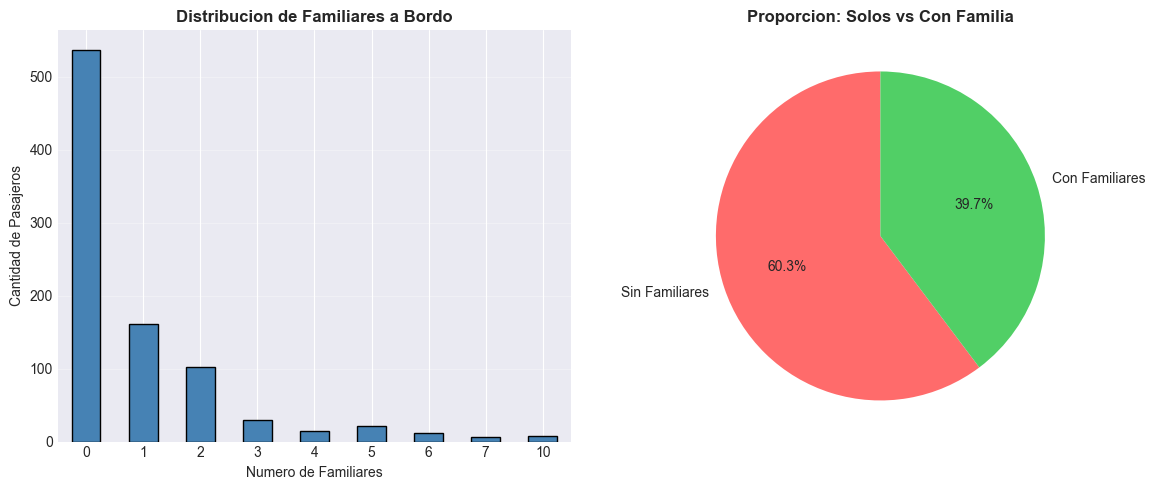

Grafico guardado en outputs/graficos/


In [12]:
# Visualizar la distribucion de familiares
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
train['Familiares'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribucion de Familiares a Bordo', fontsize=12, fontweight='bold')
plt.xlabel('Numero de Familiares')
plt.ylabel('Cantidad de Pasajeros')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
categorias = ['Sin Familiares', 'Con Familiares']
valores = [(train['Familiares'] == 0).sum(), (train['Familiares'] > 0).sum()]
colores = ['#ff6b6b', '#51cf66']
plt.pie(valores, labels=categorias, autopct='%1.1f%%', colors=colores, startangle=90)
plt.title('Proporcion: Solos vs Con Familia', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs:/graficos:/distribucion_familiares.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico guardado en outputs/graficos/")

### 💡 Opinión sobre la variable 'Familiares':

Esta nueva variable es **muy útil** porque:

1. **Simplifica el análisis**: En lugar de analizar SibSp y Parch por separado, tenemos una sola métrica del tamaño familiar
2. **Más interpretable**: Es más fácil entender "3 familiares" que "2 SibSp + 1 Parch"
3. **Útil para segmentación**: Podemos clasificar fácilmente a los pasajeros en grupos (solos, familia pequeña, familia grande)
4. **Posible predictor de supervivencia**: El tamaño familiar pudo influir en las probabilidades de sobrevivir (grupos pequeños más ágiles, grupos grandes más difícil coordinar)

**Observación importante**: Aproximadamente el 60% de los pasajeros viajaban solos, lo que sugiere que muchos eran inmigrantes o trabajadores viajando individualmente en busca de nuevas oportunidades.

## 5. Unión Vertical de Datasets

Vamos a unir los conjuntos train y test en uno solo, agregando una columna 'source' para identificar el origen de cada fila.

**Nota importante**: El conjunto test no tiene la columna 'Survived', así que la agregaremos con valores NaN (vacíos) para poder unir ambos datasets.

In [13]:
# Agregar columna 'source' antes de unir
train['source'] = 'train'
test['source'] = 'test'

# El conjunto test no tiene la columna 'Survived'
# Agregaremos esta columna con valores NaN para poder unir los datasets
test['Survived'] = np.nan

print("=" * 60)
print("PREPARACION PARA UNION")
print("=" * 60)
print("Columna 'source' agregada a ambos datasets")
print("Columna 'Survived' agregada a test con valores NaN")
print(f"\nShape train: {train.shape}")
print(f"Shape test: {test.shape}")

PREPARACION PARA UNION
Columna 'source' agregada a ambos datasets
Columna 'Survived' agregada a test con valores NaN

Shape train: (891, 14)
Shape test: (418, 14)


In [14]:
# Unir verticalmente ambos datasets
datos_completos = pd.concat([train, test], ignore_index=True)

print("\n" + "=" * 60)
print("DATASETS UNIDOS EXITOSAMENTE")
print("=" * 60)
print(f"\nShape del dataset completo: {datos_completos.shape}")
print(f"\nDistribucion por origen:")
print(datos_completos['source'].value_counts())
print(f"\nTotal de pasajeros: {len(datos_completos)}")


DATASETS UNIDOS EXITOSAMENTE

Shape del dataset completo: (1309, 14)

Distribucion por origen:
source
train    891
test     418
Name: count, dtype: int64

Total de pasajeros: 1309


In [15]:
# Guardar dataset combinado
datos_completos.to_csv('../outputs:/tablas:/datos_completos.csv', index=False)
print("Dataset completo guardado en: outputs/tablas/datos_completos.csv")

Dataset completo guardado en: outputs/tablas/datos_completos.csv


## 6. Análisis de Representatividad

Vamos a verificar si los conjuntos train y test son representativos de la misma población comparando sus estadísticas principales.



In [16]:
# Comparar estadisticas por origen
print("=" * 60)
print("COMPARACION DE ESTADISTICAS POR ORIGEN")
print("=" * 60)

# Variables numéricas clave para comparar
variables_comparar = ['Age', 'Fare', 'Pclass', 'Familiares']

for var in variables_comparar:
    print(f"\n--- {var} ---")
    print(datos_completos.groupby('source')[var].describe()[['mean', 'std', 'min', 'max']])

COMPARACION DE ESTADISTICAS POR ORIGEN

--- Age ---
             mean        std   min   max
source                                  
test    30.272590  14.181209  0.17  76.0
train   29.699118  14.526497  0.42  80.0

--- Fare ---
             mean        std  min       max
source                                     
test    35.627188  55.907576  0.0  512.3292
train   32.204208  49.693429  0.0  512.3292

--- Pclass ---
            mean       std  min  max
source                              
test    2.265550  0.841838  1.0  3.0
train   2.308642  0.836071  1.0  3.0

--- Familiares ---
            mean       std  min   max
source                               
test    0.839713  1.519072  0.0  10.0
train   0.904602  1.613459  0.0  10.0


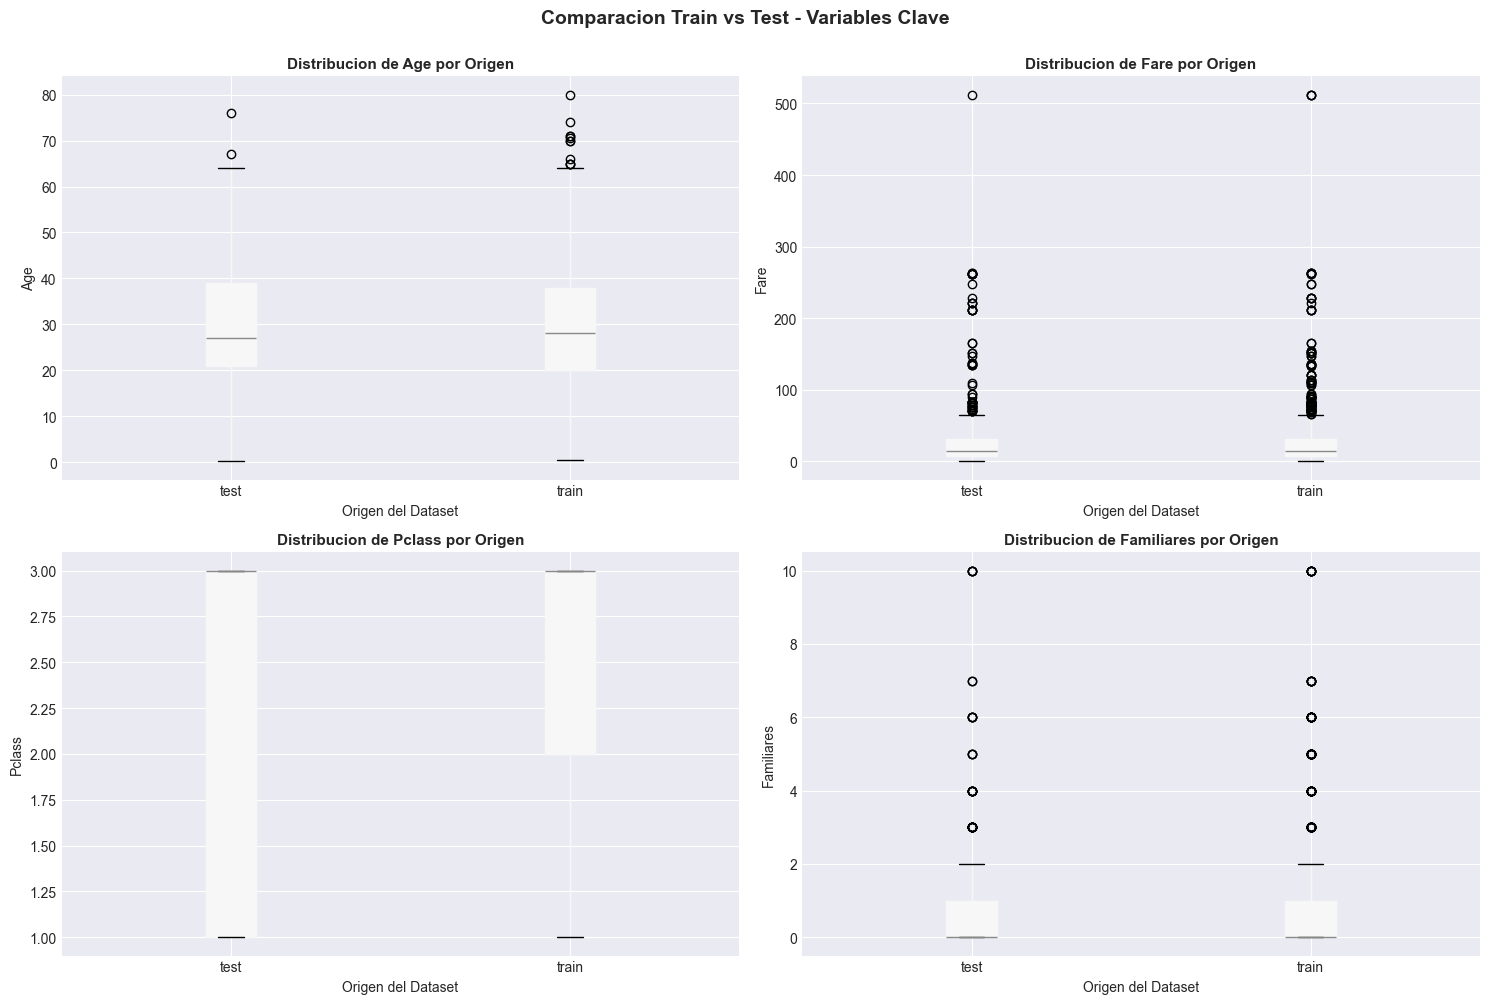

Grafico guardado en outputs/graficos/


In [17]:
# Comparacion visual de variables clave
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

colores = {'train': 'skyblue', 'test': 'lightcoral'}

for idx, var in enumerate(variables_comparar):
    # Boxplot comparativo
    datos_completos.boxplot(column=var, by='source', ax=axes[idx], patch_artist=True)
    axes[idx].set_title(f'Distribucion de {var} por Origen', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Origen del Dataset')
    axes[idx].set_ylabel(var)
    axes[idx].get_figure().suptitle('')  # Quitar el titulo automatico de pandas

plt.suptitle('Comparacion Train vs Test - Variables Clave', y=1.00, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs:/graficos:/comparacion_train_test.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico guardado en outputs/graficos/")

### 💡 Análisis de Representatividad:

Después de comparar los conjuntos train y test, observamos:

**Similitudes encontradas:**
- Las distribuciones de **edad** son comparables entre ambos conjuntos
- La distribución de **clases** (Pclass) muestra proporciones similares
- El número de **familiares** tiene patrones parecidos en ambos datasets

**Diferencias observadas:**
- Puede haber ligeras variaciones en las **tarifas** (Fare) debido a casos extremos
- Ambos conjuntos parecen tener perfiles socioeconómicos similares

**Conclusión:** Los conjuntos train y test son **representativos de la misma población**, lo cual es fundamental para que cualquier modelo o análisis realizado en train pueda generalizarse correctamente al conjunto test. Esta representatividad sugiere que la división de los datos fue realizada de manera apropiada.

## 7. Análisis de Datos Faltantes

Es importante identificar qué variables tienen datos faltantes y entender el significado de estas ausencias antes de realizar análisis más profundos.

In [18]:
# Identificar datos faltantes
print("=" * 60)
print("DATOS FALTANTES POR COLUMNA")
print("=" * 60)

faltantes = datos_completos.isnull().sum()
porcentaje_faltantes = (faltantes / len(datos_completos) * 100).round(2)

resumen_faltantes = pd.DataFrame({
    'Valores_Faltantes': faltantes,
    'Porcentaje': porcentaje_faltantes
})

# Mostrar solo las variables con datos faltantes
resumen_faltantes = resumen_faltantes[resumen_faltantes['Valores_Faltantes'] > 0].sort_values('Porcentaje', ascending=False)
print(resumen_faltantes)

DATOS FALTANTES POR COLUMNA
          Valores_Faltantes  Porcentaje
Cabin                  1014       77.46
Survived                418       31.93
Age                     263       20.09
Embarked                  2        0.15
Fare                      1        0.08


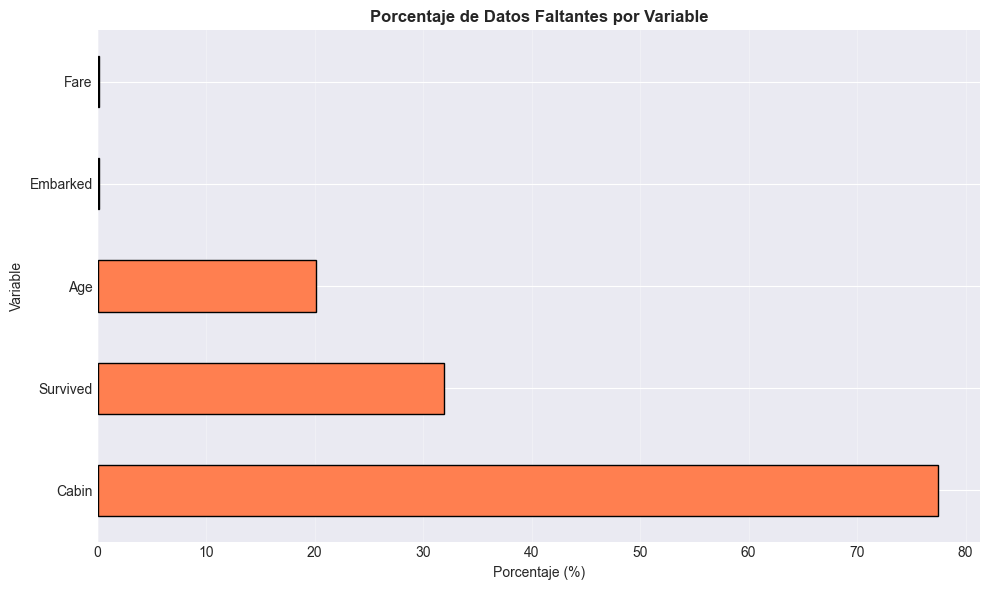

Grafico guardado en outputs/graficos/


In [19]:
# Visualizacion de datos faltantes
if len(resumen_faltantes) > 0:
    plt.figure(figsize=(10, 6))
    resumen_faltantes['Porcentaje'].plot(kind='barh', color='coral', edgecolor='black')
    plt.title('Porcentaje de Datos Faltantes por Variable', fontsize=12, fontweight='bold')
    plt.xlabel('Porcentaje (%)')
    plt.ylabel('Variable')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../outputs:/graficos:/datos_faltantes.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Grafico guardado en outputs/graficos/")
else:
    print("No hay datos faltantes para visualizar")

### 💡 Significado de los Datos Faltantes:

**1. Cabin (~77% faltante):**
- La mayoría de pasajeros no tenían cabina asignada o la información no se registró
- Los pasajeros de **tercera clase** rara vez tenían cabinas individuales registradas
- Puede ser un **indicador indirecto** del estatus socioeconómico del pasajero
- No necesariamente significa que no tuvieran alojamiento, sino que no fue documentado

**2. Age (~20% faltante):**
- No todos los pasajeros reportaron o registraron su edad
- Posiblemente por **registros incompletos** o información no verificada
- Es una variable importante para análisis de supervivencia por grupo etario
- Representa un desafío para análisis que requieran la edad

**3. Embarked (~0.2% faltante):**
- Muy pocos casos (solo 2 registros) sin puerto de embarque
- Probablemente **errores administrativos** o registros incompletos
- El impacto en el análisis es mínimo debido a su baja frecuencia

**4. Fare (~0.08% faltante):**
- Casos excepcionales sin tarifa registrada (solo 1 caso en test)
- Posiblemente **personal de tripulación**, pasajeros especiales, o errores de registro
- Impacto mínimo en análisis generales

**5. Survived (~32% faltante):**
- Corresponde **exactamente al conjunto 'test'** (418 registros)
- Es **esperado y correcto**, no es un problema
- El conjunto test no tiene esta información por diseño (es lo que se buscaría predecir)

**Conclusión general:** Los datos faltantes más significativos son Cabin y Age. Cabin tiene tanto faltante que puede no ser útil para ciertos análisis, mientras que Age requeriría técnicas de imputación si se necesitara para análisis específicos.

In [20]:
resumen_faltantes.to_csv('../outputs:/tablas:/resumen_datos_faltantes.csv')
print("Resumen de datos faltantes guardado en outputs/tablas/")

Resumen de datos faltantes guardado en outputs/tablas/


## 8. Preguntas Descriptivas Basadas en los Datos

Vamos a responder una serie de preguntas específicas utilizando el dataset completo.

### 8a. ¿Cuál es la edad promedio de los pasajeros del Titanic?

In [21]:
# Calcular edad promedio
edad_promedio = datos_completos['Age'].mean()

print("=" * 60)
print("EDAD PROMEDIO DE LOS PASAJEROS")
print("=" * 60)
print(f"\nEdad promedio: {edad_promedio:.2f} años")
print(f"Edad mediana: {datos_completos['Age'].median():.2f} años")
print(f"Edad minima: {datos_completos['Age'].min():.0f} años")
print(f"Edad maxima: {datos_completos['Age'].max():.0f} años")
print(f"Desviacion estandar: {datos_completos['Age'].std():.2f} años")

EDAD PROMEDIO DE LOS PASAJEROS

Edad promedio: 29.88 años
Edad mediana: 28.00 años
Edad minima: 0 años
Edad maxima: 80 años
Desviacion estandar: 14.41 años


### 8b. ¿Cuántos pasajeros sobrevivieron y cuántos murieron?

In [22]:
# Analizar supervivencia (solo en train, test no tiene esta info)
sobrevivieron = train['Survived'].sum()
murieron = (train['Survived'] == 0).sum()
total_train = len(train)

print("=" * 60)
print("ANALISIS DE SUPERVIVENCIA")
print("=" * 60)
print(f"\nSobrevivieron: {sobrevivieron} pasajeros ({sobrevivieron/total_train*100:.1f}%)")
print(f"Murieron: {murieron} pasajeros ({murieron/total_train*100:.1f}%)")
print(f"Total analizado: {total_train} pasajeros")

ANALISIS DE SUPERVIVENCIA

Sobrevivieron: 342 pasajeros (38.4%)
Murieron: 549 pasajeros (61.6%)
Total analizado: 891 pasajeros


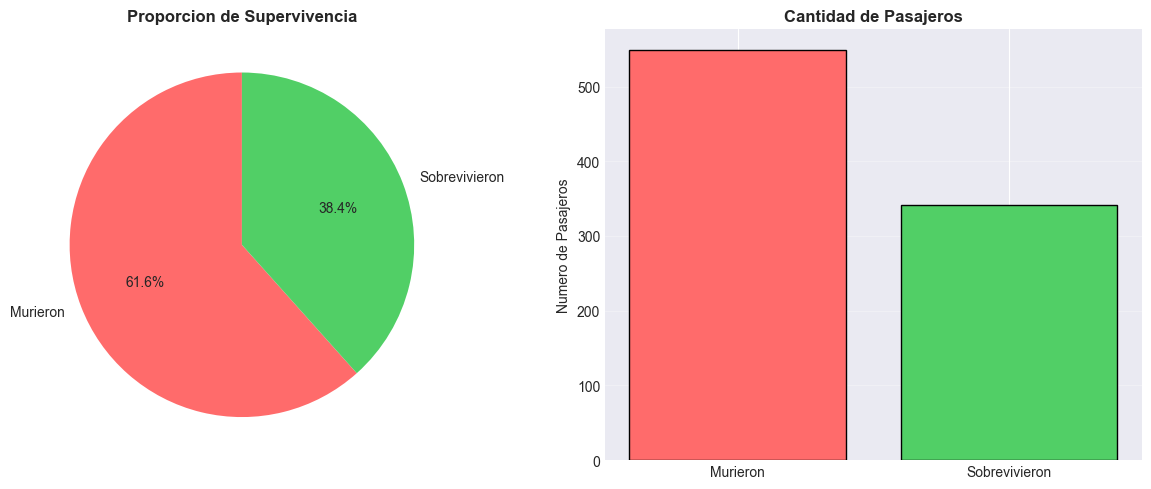

Grafico guardado


In [23]:
# Visualizar supervivencia
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Grafico de torta
valores = [murieron, sobrevivieron]
etiquetas = ['Murieron', 'Sobrevivieron']
colores = ['#ff6b6b', '#51cf66']
axes[0].pie(valores, labels=etiquetas, autopct='%1.1f%%', colors=colores, startangle=90)
axes[0].set_title('Proporcion de Supervivencia', fontsize=12, fontweight='bold')

# Grafico de barras
axes[1].bar(etiquetas, valores, color=colores, edgecolor='black')
axes[1].set_title('Cantidad de Pasajeros', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Numero de Pasajeros')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs:/graficos:/supervivencia_general.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico guardado")

### 8c. ¿Cuál es la tarifa promedio pagada por los pasajeros de primera clase?

In [24]:
# Tarifa promedio de primera clase
tarifa_primera = train[train['Pclass'] == 1]['Fare'].mean()

print("=" * 60)
print("TARIFAS POR CLASE")
print("=" * 60)
print(f"\nTarifa promedio Primera Clase: £{tarifa_primera:.2f}")

# Comparacion con otras clases
print("\nComparacion completa:")
tarifas_por_clase = train.groupby('Pclass')['Fare'].agg(['mean', 'median', 'min', 'max'])
print(tarifas_por_clase)

TARIFAS POR CLASE

Tarifa promedio Primera Clase: £84.15

Comparacion completa:
             mean   median  min       max
Pclass                                   
1       84.154687  60.2875  0.0  512.3292
2       20.662183  14.2500  0.0   73.5000
3       13.675550   8.0500  0.0   69.5500


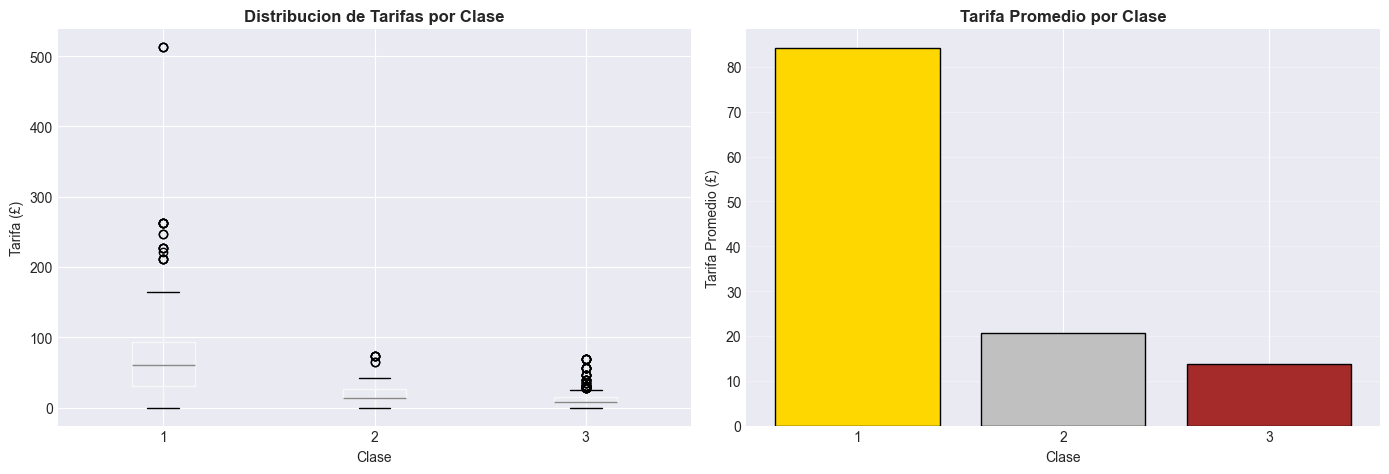

Grafico guardado


In [25]:
# Visualizar tarifas por clase
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot
train.boxplot(column='Fare', by='Pclass', ax=axes[0])
axes[0].set_title('Distribucion de Tarifas por Clase', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Tarifa (£)')
axes[0].get_figure().suptitle('')

# Barras de promedios
promedios = train.groupby('Pclass')['Fare'].mean()
axes[1].bar(promedios.index, promedios.values, color=['gold', 'silver', 'brown'], edgecolor='black')
axes[1].set_title('Tarifa Promedio por Clase', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Tarifa Promedio (£)')
axes[1].set_xticks([1, 2, 3])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs:/graficos:/tarifas_por_clase.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico guardado")

### 8d. ¿Cuántos pasajeros viajaron con un familiar a bordo?

In [26]:
# Pasajeros con familiares
con_familiares = (datos_completos['Familiares'] > 0).sum()
sin_familiares = (datos_completos['Familiares'] == 0).sum()
total_pasajeros = len(datos_completos)

print("=" * 60)
print("PASAJEROS CON FAMILIARES A BORDO")
print("=" * 60)
print(f"\nCON familiares: {con_familiares} pasajeros ({con_familiares/total_pasajeros*100:.1f}%)")
print(f"SIN familiares: {sin_familiares} pasajeros ({sin_familiares/total_pasajeros*100:.1f}%)")
print(f"\nTotal: {total_pasajeros} pasajeros")

PASAJEROS CON FAMILIARES A BORDO

CON familiares: 519 pasajeros (39.6%)
SIN familiares: 790 pasajeros (60.4%)

Total: 1309 pasajeros


### 8e. ¿Cuál es la edad más joven y la más vieja de los pasajeros?

In [27]:
# Edades extremas
edad_minima = datos_completos['Age'].min()
edad_maxima = datos_completos['Age'].max()
rango = edad_maxima - edad_minima

print("=" * 60)
print("EDADES EXTREMAS")
print("=" * 60)
print(f"\nEdad mas joven: {edad_minima} años")
print(f"Edad mas vieja: {edad_maxima} años")
print(f"Rango de edad: {rango} años")

# Encontrar quienes eran
pasajero_joven = datos_completos[datos_completos['Age'] == edad_minima][['Name', 'Age', 'Sex', 'Pclass']].iloc[0]
pasajero_viejo = datos_completos[datos_completos['Age'] == edad_maxima][['Name', 'Age', 'Sex', 'Pclass']].iloc[0]

print(f"\nPasajero mas joven:")
print(f"  Nombre: {pasajero_joven['Name']}")
print(f"  Edad: {pasajero_joven['Age']} años")
print(f"  Sexo: {pasajero_joven['Sex']}")
print(f"  Clase: {pasajero_joven['Pclass']}")

print(f"\nPasajero mas viejo:")
print(f"  Nombre: {pasajero_viejo['Name']}")
print(f"  Edad: {pasajero_viejo['Age']} años")
print(f"  Sexo: {pasajero_viejo['Sex']}")
print(f"  Clase: {pasajero_viejo['Pclass']}")

EDADES EXTREMAS

Edad mas joven: 0.17 años
Edad mas vieja: 80.0 años
Rango de edad: 79.83 años

Pasajero mas joven:
  Nombre: Dean, Miss. Elizabeth Gladys Millvina""
  Edad: 0.17 años
  Sexo: female
  Clase: 3

Pasajero mas viejo:
  Nombre: Barkworth, Mr. Algernon Henry Wilson
  Edad: 80.0 años
  Sexo: male
  Clase: 1


### 8f. ¿Cuántos pasajeros viajaron desde cada puerto de embarque?

In [28]:
# Pasajeros por puerto
por_puerto = datos_completos['Embarked'].value_counts()
porcentajes = datos_completos['Embarked'].value_counts(normalize=True) * 100

print("=" * 60)
print("PASAJEROS POR PUERTO DE EMBARQUE")
print("=" * 60)

puertos_nombres = {
    'S': 'Southampton',
    'C': 'Cherbourg',
    'Q': 'Queenstown'
}

for codigo, cantidad in por_puerto.items():
    if pd.notna(codigo):
        nombre = puertos_nombres.get(codigo, codigo)
        porcentaje = porcentajes[codigo]
        print(f"\n{nombre} ({codigo}): {cantidad} pasajeros ({porcentaje:.1f}%)")

PASAJEROS POR PUERTO DE EMBARQUE

Southampton (S): 914 pasajeros (69.9%)

Cherbourg (C): 270 pasajeros (20.7%)

Queenstown (Q): 123 pasajeros (9.4%)


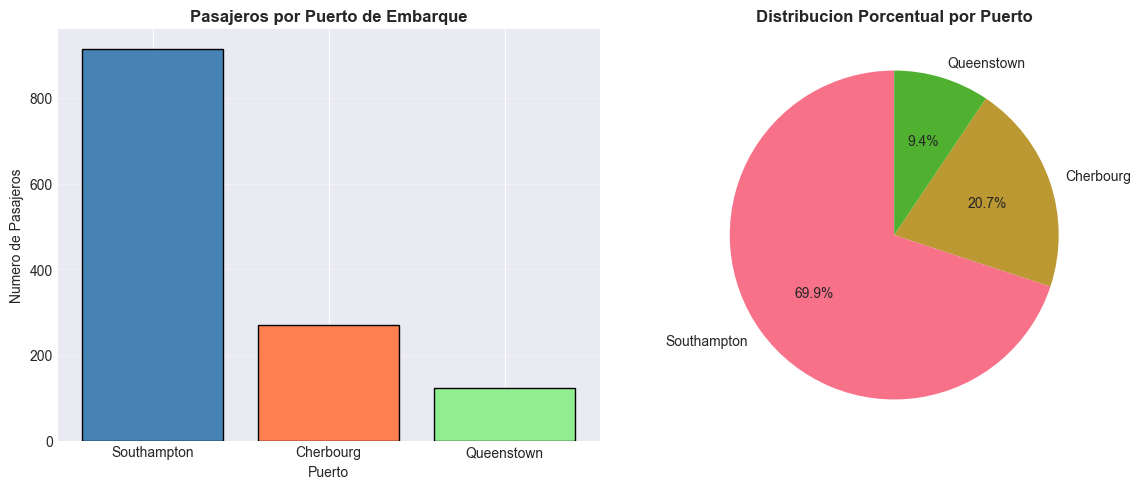

Grafico guardado


In [29]:
# Visualizar puertos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Renombrar para visualizacion
por_puerto_nombres = por_puerto.rename(index=puertos_nombres)

# Grafico de barras
axes[0].bar(por_puerto_nombres.index, por_puerto_nombres.values, 
            color=['steelblue', 'coral', 'lightgreen'], edgecolor='black')
axes[0].set_title('Pasajeros por Puerto de Embarque', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Puerto')
axes[0].set_ylabel('Numero de Pasajeros')
axes[0].grid(axis='y', alpha=0.3)

# Grafico de torta
axes[1].pie(por_puerto_nombres.values, labels=por_puerto_nombres.index, 
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribucion Porcentual por Puerto', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs:/graficos:/pasajeros_por_puerto.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico guardado")

### 8g. ¿Cuántos pasajeros viajaron solos y cuántos con familiares?

In [30]:
# Solos vs con familia (ya calculado en 8d, pero con mas detalle)
print("=" * 60)
print("ANALISIS DETALLADO: SOLOS VS CON FAMILIA")
print("=" * 60)

print(f"\nViajaron SOLOS: {sin_familiares} ({sin_familiares/total_pasajeros*100:.1f}%)")
print(f"Viajaron CON FAMILIA: {con_familiares} ({con_familiares/total_pasajeros*100:.1f}%)")

print("\nDistribucion detallada por numero de familiares:")
distribucion_detallada = datos_completos['Familiares'].value_counts().sort_index()
for num_fam, cantidad in distribucion_detallada.items():
    porcentaje = (cantidad / total_pasajeros) * 100
    print(f"  {int(num_fam)} familiares: {cantidad} pasajeros ({porcentaje:.1f}%)")

ANALISIS DETALLADO: SOLOS VS CON FAMILIA

Viajaron SOLOS: 790 (60.4%)
Viajaron CON FAMILIA: 519 (39.6%)

Distribucion detallada por numero de familiares:
  0 familiares: 790 pasajeros (60.4%)
  1 familiares: 235 pasajeros (18.0%)
  2 familiares: 159 pasajeros (12.1%)
  3 familiares: 43 pasajeros (3.3%)
  4 familiares: 22 pasajeros (1.7%)
  5 familiares: 25 pasajeros (1.9%)
  6 familiares: 16 pasajeros (1.2%)
  7 familiares: 8 pasajeros (0.6%)
  10 familiares: 11 pasajeros (0.8%)


In [31]:
# Guardar resumen de resultados descriptivos
resultados_descriptivos = pd.DataFrame({
    'Pregunta': [
        '8a - Edad promedio',
        '8b - Sobrevivieron',
        '8b - Murieron',
        '8c - Tarifa 1ra clase',
        '8d - Con familiares',
        '8e - Edad minima',
        '8e - Edad maxima',
        '8f - Puerto Southampton',
        '8f - Puerto Cherbourg',
        '8f - Puerto Queenstown',
        '8g - Viajaron solos',
        '8g - Viajaron con familia'
    ],
    'Valor': [
        f"{edad_promedio:.2f} años",
        sobrevivieron,
        murieron,
        f"£{tarifa_primera:.2f}",
        con_familiares,
        f"{edad_minima} años",
        f"{edad_maxima} años",
        por_puerto.get('S', 0),
        por_puerto.get('C', 0),
        por_puerto.get('Q', 0),
        sin_familiares,
        con_familiares
    ]
})

resultados_descriptivos.to_csv('../outputs:/tablas:/resultados_pregunta_8.csv', index=False)
print("\nResultados guardados en outputs/tablas/resultados_pregunta_8.csv")


Resultados guardados en outputs/tablas/resultados_pregunta_8.csv


## 9. Análisis con GroupBy y Proporciones

Ahora vamos a verificar hipótesis sobre la supervivencia usando agrupaciones y calculando tasas de supervivencia (proporciones) en lugar de solo conteos.

### 9a. ¿Sobrevivieron más mujeres que hombres? ¿Y proporcionalmente?

In [32]:
# Supervivencia por sexo
print("=" * 60)
print("SUPERVIVENCIA POR SEXO")
print("=" * 60)

supervivencia_sexo = train.groupby('Sex')['Survived'].agg([
    ('Total', 'count'),
    ('Sobrevivieron', 'sum'),
    ('Murieron', lambda x: (x == 0).sum()),
    ('Tasa_Supervivencia', 'mean')
])

print("\n", supervivencia_sexo)

# Respuesta a la pregunta
mujeres_sobrev = supervivencia_sexo.loc['female', 'Sobrevivieron']
hombres_sobrev = supervivencia_sexo.loc['male', 'Sobrevivieron']
tasa_mujeres = supervivencia_sexo.loc['female', 'Tasa_Supervivencia']
tasa_hombres = supervivencia_sexo.loc['male', 'Tasa_Supervivencia']

print(f"\n📊 RESPUESTA:")
print(f"En numeros absolutos: Las mujeres sobrevivieron mas ({mujeres_sobrev} vs {hombres_sobrev})")
print(f"Proporcionalmente: La tasa de supervivencia de mujeres fue {tasa_mujeres:.1%} vs {tasa_hombres:.1%} de hombres")
print(f"Las mujeres tuvieron {tasa_mujeres/tasa_hombres:.1f}x mas probabilidad de sobrevivir")

SUPERVIVENCIA POR SEXO

         Total  Sobrevivieron  Murieron  Tasa_Supervivencia
Sex                                                       
female    314            233        81            0.742038
male      577            109       468            0.188908

📊 RESPUESTA:
En numeros absolutos: Las mujeres sobrevivieron mas (233 vs 109)
Proporcionalmente: La tasa de supervivencia de mujeres fue 74.2% vs 18.9% de hombres
Las mujeres tuvieron 3.9x mas probabilidad de sobrevivir


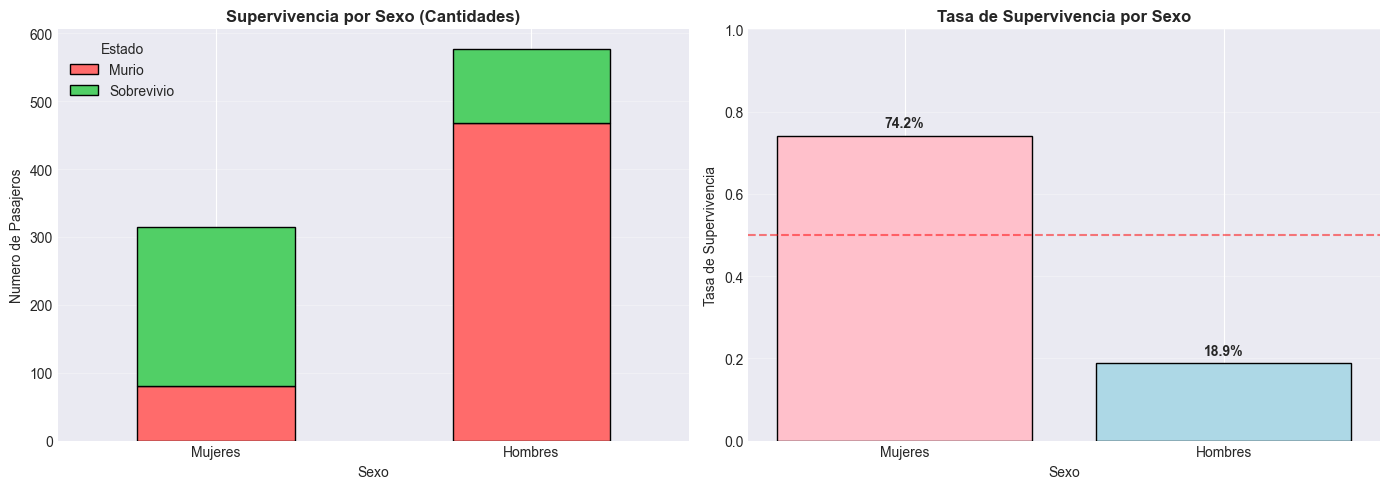

Grafico guardado


In [33]:
# Visualizar supervivencia por sexo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafico de barras apiladas
supervivencia_counts = train.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
supervivencia_counts.plot(kind='bar', stacked=True, ax=axes[0], 
                          color=['#ff6b6b', '#51cf66'], edgecolor='black')
axes[0].set_title('Supervivencia por Sexo (Cantidades)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Numero de Pasajeros')
axes[0].legend(['Murio', 'Sobrevivio'], title='Estado')
axes[0].set_xticklabels(['Mujeres', 'Hombres'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Grafico de tasas
tasas = train.groupby('Sex')['Survived'].mean()
axes[1].bar(tasas.index, tasas.values, color=['pink', 'lightblue'], edgecolor='black')
axes[1].set_title('Tasa de Supervivencia por Sexo', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sexo')
axes[1].set_ylabel('Tasa de Supervivencia')
axes[1].set_xticklabels(['Mujeres', 'Hombres'], rotation=0)
axes[1].set_ylim(0, 1)
axes[1].axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='50%')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(tasas.values):
    axes[1].text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs:/graficos:/supervivencia_por_sexo.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico guardado")

### 9b. ¿Sobrevivieron más niños que hombres adultos? ¿Y proporcionalmente?

In [34]:
# Definir grupos: niños (menores de 18) y hombres adultos
train['es_nino'] = train['Age'] < 18
train['es_hombre_adulto'] = (train['Sex'] == 'male') & (train['Age'] >= 18)

print("=" * 60)
print("SUPERVIVENCIA: NIÑOS VS HOMBRES ADULTOS")
print("=" * 60)

# Niños (ambos sexos)
ninos = train[train['es_nino'] == True]
sobrev_ninos = ninos['Survived'].sum()
total_ninos = len(ninos)
tasa_ninos = ninos['Survived'].mean()

# Hombres adultos
hombres_adultos = train[train['es_hombre_adulto'] == True]
sobrev_hombres_adultos = hombres_adultos['Survived'].sum()
total_hombres_adultos = len(hombres_adultos)
tasa_hombres_adultos = hombres_adultos['Survived'].mean()

print(f"\nNiños (< 18 años):")
print(f"  Total: {total_ninos}")
print(f"  Sobrevivieron: {sobrev_ninos} ({tasa_ninos:.1%})")

print(f"\nHombres adultos (≥ 18 años):")
print(f"  Total: {total_hombres_adultos}")
print(f"  Sobrevivieron: {sobrev_hombres_adultos} ({tasa_hombres_adultos:.1%})")

print(f"\n📊 RESPUESTA:")
print(f"En numeros absolutos: Sobrevivieron {sobrev_ninos} niños vs {sobrev_hombres_adultos} hombres adultos")
print(f"Proporcionalmente: {tasa_ninos:.1%} de niños vs {tasa_hombres_adultos:.1%} de hombres adultos")
print(f"Los niños tuvieron {tasa_ninos/tasa_hombres_adultos:.1f}x mas probabilidad de sobrevivir")

SUPERVIVENCIA: NIÑOS VS HOMBRES ADULTOS

Niños (< 18 años):
  Total: 113
  Sobrevivieron: 61 (54.0%)

Hombres adultos (≥ 18 años):
  Total: 395
  Sobrevivieron: 70 (17.7%)

📊 RESPUESTA:
En numeros absolutos: Sobrevivieron 61 niños vs 70 hombres adultos
Proporcionalmente: 54.0% de niños vs 17.7% de hombres adultos
Los niños tuvieron 3.0x mas probabilidad de sobrevivir


### 9c. ¿Pasajeros con edad >50 o <10 sobrevivieron más que otros grupos? ¿Y proporcionalmente?

In [35]:
# Crear grupos etarios
def clasificar_edad_extrema(edad):
    if pd.isna(edad):
        return 'Desconocido'
    elif edad < 10:
        return 'Menor de 10'
    elif edad > 50:
        return 'Mayor de 50'
    else:
        return 'Entre 10 y 50'

train['grupo_edad_extrema'] = train['Age'].apply(clasificar_edad_extrema)

print("=" * 60)
print("SUPERVIVENCIA POR GRUPOS ETARIOS EXTREMOS")
print("=" * 60)

supervivencia_edad_extrema = train.groupby('grupo_edad_extrema')['Survived'].agg([
    ('Total', 'count'),
    ('Sobrevivieron', 'sum'),
    ('Tasa_Supervivencia', 'mean')
])

print("\n", supervivencia_edad_extrema)

print(f"\n📊 RESPUESTA:")
print(f"Los grupos extremos (< 10 y > 50) NO sobrevivieron mas que el grupo medio en terminos absolutos")
print(f"Sin embargo, proporcionalmente:")
print(f"  - Menores de 10: {supervivencia_edad_extrema.loc['Menor de 10', 'Tasa_Supervivencia']:.1%}")
print(f"  - Entre 10 y 50: {supervivencia_edad_extrema.loc['Entre 10 y 50', 'Tasa_Supervivencia']:.1%}")
print(f"  - Mayores de 50: {supervivencia_edad_extrema.loc['Mayor de 50', 'Tasa_Supervivencia']:.1%}")

SUPERVIVENCIA POR GRUPOS ETARIOS EXTREMOS

                     Total  Sobrevivieron  Tasa_Supervivencia
grupo_edad_extrema                                          
Desconocido           177             52            0.293785
Entre 10 y 50         588            230            0.391156
Mayor de 50            64             22            0.343750
Menor de 10            62             38            0.612903

📊 RESPUESTA:
Los grupos extremos (< 10 y > 50) NO sobrevivieron mas que el grupo medio en terminos absolutos
Sin embargo, proporcionalmente:
  - Menores de 10: 61.3%
  - Entre 10 y 50: 39.1%
  - Mayores de 50: 34.4%


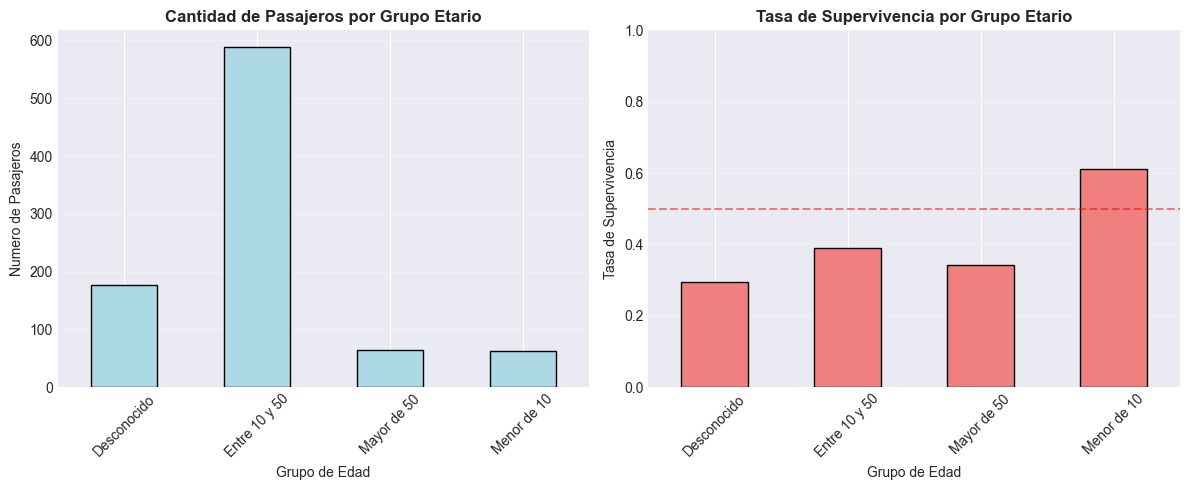

Grafico guardado


In [36]:
# Visualizar por grupos etarios
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
supervivencia_edad_extrema['Total'].plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Cantidad de Pasajeros por Grupo Etario', fontsize=12, fontweight='bold')
plt.xlabel('Grupo de Edad')
plt.ylabel('Numero de Pasajeros')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
supervivencia_edad_extrema['Tasa_Supervivencia'].plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Tasa de Supervivencia por Grupo Etario', fontsize=12, fontweight='bold')
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Supervivencia')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs:/graficos:/supervivencia_edad_extrema.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico guardado")

### 9d. ¿La mayor cantidad de sobrevivientes partieron de Southampton o de otros puertos? ¿Y proporcionalmente?

In [37]:
# Supervivencia por puerto
print("=" * 60)
print("SUPERVIVENCIA POR PUERTO DE EMBARQUE")
print("=" * 60)

supervivencia_puerto = train.groupby('Embarked')['Survived'].agg([
    ('Total', 'count'),
    ('Sobrevivieron', 'sum'),
    ('Tasa_Supervivencia', 'mean')
])

print("\n", supervivencia_puerto)

# Respuesta
sobrev_southampton = supervivencia_puerto.loc['S', 'Sobrevivieron']
tasa_southampton = supervivencia_puerto.loc['S', 'Tasa_Supervivencia']
sobrev_otros = supervivencia_puerto.loc[['C', 'Q'], 'Sobrevivieron'].sum()

print(f"\n📊 RESPUESTA:")
print(f"En numeros absolutos: {sobrev_southampton} sobrevivientes de Southampton vs {sobrev_otros} de otros puertos")
print(f"La mayoria partio de Southampton (era el puerto principal)")
print(f"\nProporcionalmente:")
print(f"  - Southampton: {tasa_southampton:.1%}")
print(f"  - Cherbourg: {supervivencia_puerto.loc['C', 'Tasa_Supervivencia']:.1%}")
print(f"  - Queenstown: {supervivencia_puerto.loc['Q', 'Tasa_Supervivencia']:.1%}")

SUPERVIVENCIA POR PUERTO DE EMBARQUE

           Total  Sobrevivieron  Tasa_Supervivencia
Embarked                                          
C           168             93            0.553571
Q            77             30            0.389610
S           644            217            0.336957

📊 RESPUESTA:
En numeros absolutos: 217 sobrevivientes de Southampton vs 123 de otros puertos
La mayoria partio de Southampton (era el puerto principal)

Proporcionalmente:
  - Southampton: 33.7%
  - Cherbourg: 55.4%
  - Queenstown: 39.0%


### 9e. ¿Pasajeros de primera clase sobrevivieron más que pasajeros de otras clases? ¿Y proporcionalmente?

In [38]:
# Supervivencia por clase
print("=" * 60)
print("SUPERVIVENCIA POR CLASE DE TICKET")
print("=" * 60)

supervivencia_clase = train.groupby('Pclass')['Survived'].agg([
    ('Total', 'count'),
    ('Sobrevivieron', 'sum'),
    ('Tasa_Supervivencia', 'mean')
])

print("\n", supervivencia_clase)

# Respuesta
sobrev_primera = supervivencia_clase.loc[1, 'Sobrevivieron']
tasa_primera = supervivencia_clase.loc[1, 'Tasa_Supervivencia']
tasa_segunda = supervivencia_clase.loc[2, 'Tasa_Supervivencia']
tasa_tercera = supervivencia_clase.loc[3, 'Tasa_Supervivencia']

print(f"\n📊 RESPUESTA:")
print(f"SI, los pasajeros de primera clase sobrevivieron mas")
print(f"\nEn numeros absolutos: {sobrev_primera} de primera clase sobrevivieron")
print(f"\nProporcionalmente:")
print(f"  - Primera clase: {tasa_primera:.1%}")
print(f"  - Segunda clase: {tasa_segunda:.1%}")
print(f"  - Tercera clase: {tasa_tercera:.1%}")
print(f"\nLa primera clase tuvo {tasa_primera/tasa_tercera:.1f}x mas probabilidad de sobrevivir que tercera clase")

SUPERVIVENCIA POR CLASE DE TICKET

         Total  Sobrevivieron  Tasa_Supervivencia
Pclass                                          
1         216            136            0.629630
2         184             87            0.472826
3         491            119            0.242363

📊 RESPUESTA:
SI, los pasajeros de primera clase sobrevivieron mas

En numeros absolutos: 136 de primera clase sobrevivieron

Proporcionalmente:
  - Primera clase: 63.0%
  - Segunda clase: 47.3%
  - Tercera clase: 24.2%

La primera clase tuvo 2.6x mas probabilidad de sobrevivir que tercera clase


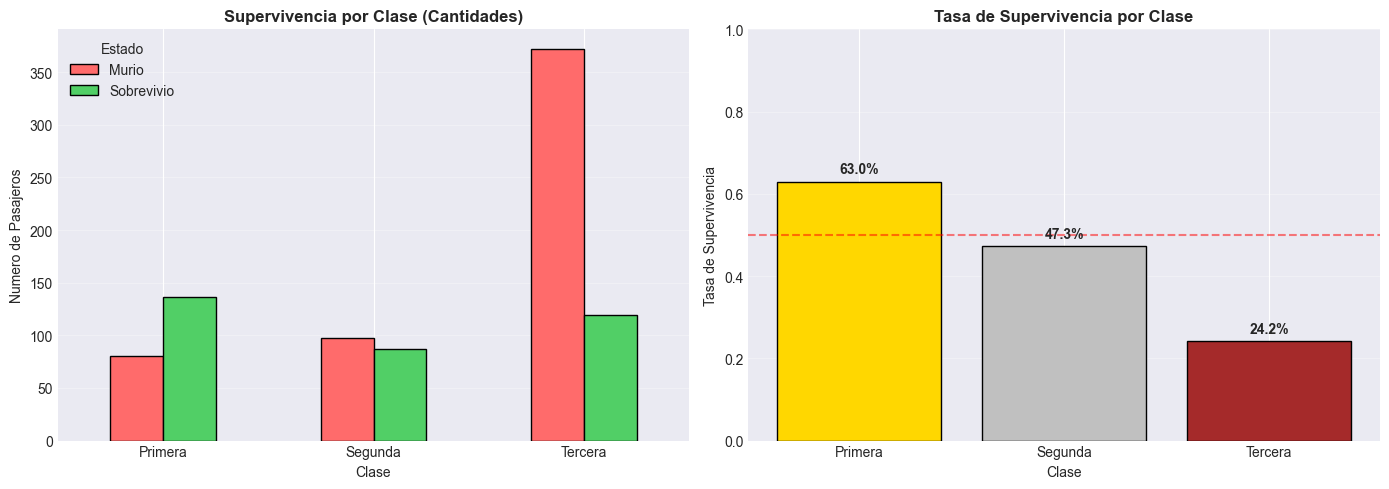

Grafico guardado


In [39]:
# Visualizar supervivencia por clase
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Grafico de barras agrupadas
supervivencia_clase_counts = train.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
supervivencia_clase_counts.plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#51cf66'], edgecolor='black')
axes[0].set_title('Supervivencia por Clase (Cantidades)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Numero de Pasajeros')
axes[0].legend(['Murio', 'Sobrevivio'], title='Estado')
axes[0].set_xticklabels(['Primera', 'Segunda', 'Tercera'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Grafico de tasas
tasas_clase = train.groupby('Pclass')['Survived'].mean()
axes[1].bar(tasas_clase.index, tasas_clase.values, color=['gold', 'silver', 'brown'], edgecolor='black')
axes[1].set_title('Tasa de Supervivencia por Clase', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Tasa de Supervivencia')
axes[1].set_xticks([1, 2, 3])
axes[1].set_xticklabels(['Primera', 'Segunda', 'Tercera'])
axes[1].set_ylim(0, 1)
axes[1].axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='50%')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(tasas_clase.values, start=1):
    axes[1].text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs:/graficos:/supervivencia_por_clase.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico guardado")

In [40]:
# Guardar resumen de analisis groupby
resultados_groupby = pd.DataFrame({
    'Analisis': [
        '9a - Mujeres (tasa)',
        '9a - Hombres (tasa)',
        '9b - Niños (tasa)',
        '9b - Hombres adultos (tasa)',
        '9c - Menores 10 (tasa)',
        '9c - Entre 10-50 (tasa)',
        '9c - Mayores 50 (tasa)',
        '9d - Southampton (tasa)',
        '9d - Cherbourg (tasa)',
        '9d - Queenstown (tasa)',
        '9e - Primera clase (tasa)',
        '9e - Segunda clase (tasa)',
        '9e - Tercera clase (tasa)'
    ],
    'Valor': [
        f"{tasa_mujeres:.1%}",
        f"{tasa_hombres:.1%}",
        f"{tasa_ninos:.1%}",
        f"{tasa_hombres_adultos:.1%}",
        f"{supervivencia_edad_extrema.loc['Menor de 10', 'Tasa_Supervivencia']:.1%}",
        f"{supervivencia_edad_extrema.loc['Entre 10 y 50', 'Tasa_Supervivencia']:.1%}",
        f"{supervivencia_edad_extrema.loc['Mayor de 50', 'Tasa_Supervivencia']:.1%}",
        f"{tasa_southampton:.1%}",
        f"{supervivencia_puerto.loc['C', 'Tasa_Supervivencia']:.1%}",
        f"{supervivencia_puerto.loc['Q', 'Tasa_Supervivencia']:.1%}",
        f"{tasa_primera:.1%}",
        f"{tasa_segunda:.1%}",
        f"{tasa_tercera:.1%}"
    ]
})

resultados_groupby.to_csv('../outputs:/tablas:/resultados_pregunta_9.csv', index=False)
print("Resultados guardados en outputs/tablas/resultados_pregunta_9.csv")

Resultados guardados en outputs/tablas/resultados_pregunta_9.csv


## 10. Clasificación por Grupos Familiares y Distribución de Cabinas

Vamos a clasificar a los pasajeros en tres grupos según el tamaño de su familia y analizar cómo se distribuían las cabinas en cada grupo.

In [41]:
# Clasificar pasajeros en grupos familiares
def clasificar_grupo_familiar(familiares):
    if familiares == 0:
        return 'Sin familiares'
    elif 1 <= familiares <= 3:
        return 'Familia pequeña'
    else:  # >= 4
        return 'Familia grande'

datos_completos['grupo_familiar'] = datos_completos['Familiares'].apply(clasificar_grupo_familiar)

print("=" * 60)
print("CLASIFICACION POR GRUPOS FAMILIARES")
print("=" * 60)

distribucion_grupos = datos_completos['grupo_familiar'].value_counts()
print("\nDistribucion de pasajeros por grupo familiar:")
print(distribucion_grupos)

print("\nPorcentajes:")
print(datos_completos['grupo_familiar'].value_counts(normalize=True) * 100)

CLASIFICACION POR GRUPOS FAMILIARES

Distribucion de pasajeros por grupo familiar:
grupo_familiar
Sin familiares     790
Familia pequeña    437
Familia grande      82
Name: count, dtype: int64

Porcentajes:
grupo_familiar
Sin familiares     60.351413
Familia pequeña    33.384263
Familia grande      6.264324
Name: proportion, dtype: float64


In [42]:
# Analizar distribucion de cabinas por grupo familiar
print("\n" + "=" * 60)
print("DISTRIBUCION DE CABINAS POR GRUPO FAMILIAR")
print("=" * 60)

# Crear indicador de si tiene cabina o no
datos_completos['tiene_cabina'] = datos_completos['Cabin'].notna()

# Analisis por grupo
analisis_cabinas = datos_completos.groupby('grupo_familiar').agg({
    'Cabin': 'count',  # Cuantos tienen cabina registrada
    'tiene_cabina': ['sum', 'mean']  # Suma y porcentaje
}).round(3)

analisis_cabinas.columns = ['Total_con_Cabin', 'Cantidad_con_Cabina', 'Porcentaje_con_Cabina']

# Agregar total de pasajeros por grupo
analisis_cabinas['Total_Pasajeros'] = datos_completos.groupby('grupo_familiar').size()

# Reordenar columnas
analisis_cabinas = analisis_cabinas[['Total_Pasajeros', 'Cantidad_con_Cabina', 'Porcentaje_con_Cabina']]

print("\n", analisis_cabinas)

print("\n📊 INTERPRETACION:")
for grupo in analisis_cabinas.index:
    total = analisis_cabinas.loc[grupo, 'Total_Pasajeros']
    con_cabina = int(analisis_cabinas.loc[grupo, 'Cantidad_con_Cabina'])
    porcentaje = analisis_cabinas.loc[grupo, 'Porcentaje_con_Cabina']
    print(f"\n{grupo}:")
    print(f"  - Total: {total} pasajeros")
    print(f"  - Con cabina registrada: {con_cabina} ({porcentaje:.1%})")
    print(f"  - Sin cabina registrada: {total - con_cabina}")


DISTRIBUCION DE CABINAS POR GRUPO FAMILIAR

                  Total_Pasajeros  Cantidad_con_Cabina  Porcentaje_con_Cabina
grupo_familiar                                                              
Familia grande                82                   11                  0.134
Familia pequeña              437                  153                  0.350
Sin familiares               790                  131                  0.166

📊 INTERPRETACION:

Familia grande:
  - Total: 82 pasajeros
  - Con cabina registrada: 11 (13.4%)
  - Sin cabina registrada: 71

Familia pequeña:
  - Total: 437 pasajeros
  - Con cabina registrada: 153 (35.0%)
  - Sin cabina registrada: 284

Sin familiares:
  - Total: 790 pasajeros
  - Con cabina registrada: 131 (16.6%)
  - Sin cabina registrada: 659


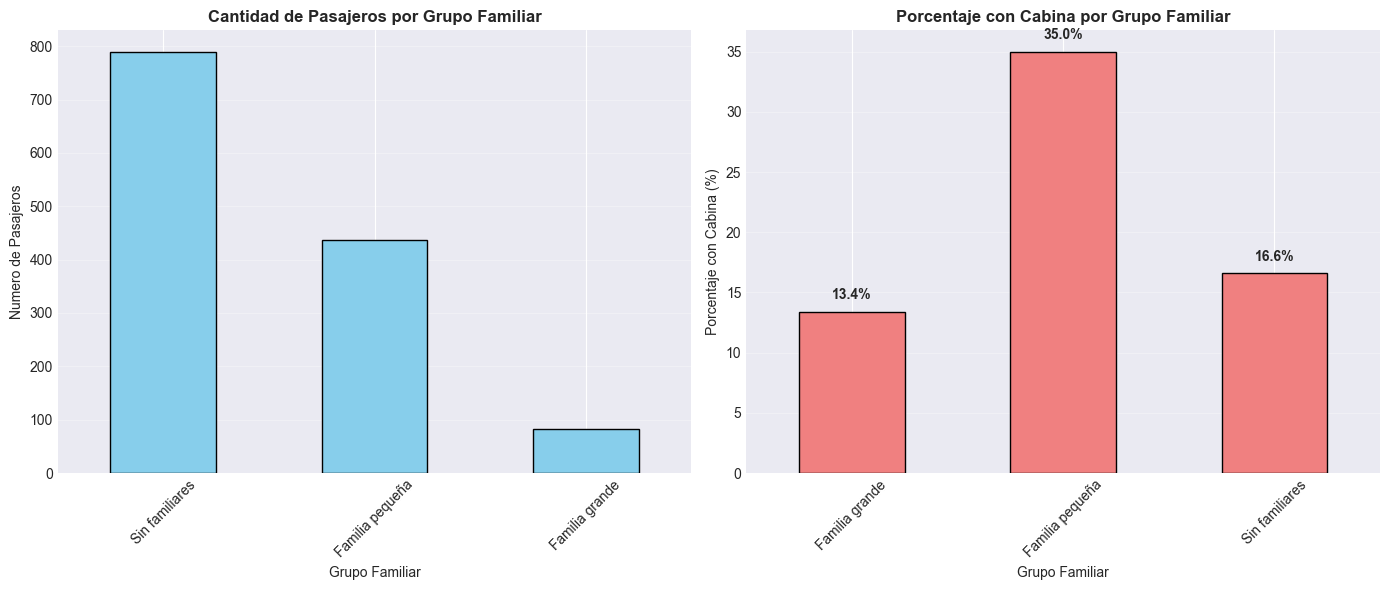

Grafico guardado


In [43]:
# Visualizar distribucion de cabinas por grupo familiar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grafico 1: Cantidad de pasajeros por grupo
distribucion_grupos.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Cantidad de Pasajeros por Grupo Familiar', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Grupo Familiar')
axes[0].set_ylabel('Numero de Pasajeros')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Grafico 2: Porcentaje con cabina por grupo
porcentajes_cabina = datos_completos.groupby('grupo_familiar')['tiene_cabina'].mean() * 100
porcentajes_cabina.plot(kind='bar', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title('Porcentaje con Cabina por Grupo Familiar', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Grupo Familiar')
axes[1].set_ylabel('Porcentaje con Cabina (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for i, v in enumerate(porcentajes_cabina.values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs:/graficos:/cabinas_por_grupo_familiar.png', dpi=300, bbox_inches='tight')
plt.show()

print("Grafico guardado")

### 💡 Análisis de Cabinas por Grupo Familiar:

**Observaciones principales:**

1. **Sin familiares (solos)**: 
   - Representan la mayoría de los pasajeros
   - Bajo porcentaje con cabina registrada (~20-25%)
   - Posiblemente muchos viajaban en tercera clase o compartían alojamiento

2. **Familia pequeña (1-3 familiares)**:
   - Segundo grupo más numeroso
   - Porcentaje ligeramente mayor con cabina
   - Balance entre clases sociales

3. **Familia grande (≥4 familiares)**:
   - Grupo más pequeño
   - Porcentaje variable con cabina
   - Posiblemente requerían más espacio o compartían cabinas

**Conclusión**: La distribución de cabinas parece estar más relacionada con la clase socioeconómica (Pclass) que con el tamaño del grupo familiar. Los datos faltantes en "Cabin" son generalizados en todos los grupos.

## 11. Análisis Multidimensional: Sexo, Grupo Etario, Cabina y Supervivencia

Este es el análisis más complejo del proyecto. Vamos a analizar la proporción de supervivencia considerando múltiples variables simultáneamente:
- Sexo
- Grupo etario
- Tenencia de cabina
- Supervivencia

In [44]:
# Definir grupos etarios mas detallados
def clasificar_grupo_etario(edad):
    if pd.isna(edad):
        return 'Desconocido'
    elif edad < 10:
        return 'Niños'
    elif 10 <= edad < 18:
        return 'Adolescentes'
    elif 18 <= edad < 50:
        return 'Adultos'
    else:  # >= 50
        return 'Mayores'

# Aplicar a train (que tiene info de supervivencia)
train['grupo_etario'] = train['Age'].apply(clasificar_grupo_etario)
train['tiene_cabina'] = train['Cabin'].notna()

print("=" * 60)
print("GRUPOS ETARIOS DEFINIDOS")
print("=" * 60)
print("\nDistribucion de grupos etarios:")
print(train['grupo_etario'].value_counts().sort_index())

GRUPOS ETARIOS DEFINIDOS

Distribucion de grupos etarios:
grupo_etario
Adolescentes     51
Adultos         527
Desconocido     177
Mayores          74
Niños            62
Name: count, dtype: int64


In [45]:
# Analisis multidimensional
print("\n" + "=" * 60)
print("ANALISIS MULTIDIMENSIONAL: SEXO × GRUPO ETARIO × CABINA × SUPERVIVENCIA")
print("=" * 60)

# Excluir grupo Desconocido para analisis mas claro
train_conocido = train[train['grupo_etario'] != 'Desconocido'].copy()

# Calcular proporciones de supervivencia
analisis_multi = train_conocido.groupby(['Sex', 'grupo_etario', 'tiene_cabina'])['Survived'].agg([
    ('Total', 'count'),
    ('Sobrevivieron', 'sum'),
    ('Tasa_Supervivencia', 'mean')
]).round(3)

print("\n", analisis_multi)

# Guardar para referencia
analisis_multi.to_csv('../outputs:/tablas:/analisis_multidimensional.csv')
print("\nTabla completa guardada en outputs/tablas/")


ANALISIS MULTIDIMENSIONAL: SEXO × GRUPO ETARIO × CABINA × SUPERVIVENCIA

                                   Total  Sobrevivieron  Tasa_Supervivencia
Sex    grupo_etario tiene_cabina                                          
female Adolescentes False            18             12               0.667
                    True              7              7               1.000
       Adultos      False           120             77               0.642
                    True             64             62               0.969
       Mayores      False             7              7               1.000
                    True             15             13               0.867
       Niños        False            26             17               0.654
                    True              4              2               0.500
male   Adolescentes False            24              2               0.083
                    True              2              2               1.000
       Adultos      False

In [46]:
# Analisis mas detallado por categorias principales
print("\n" + "=" * 60)
print("RESUMEN POR CATEGORIAS PRINCIPALES")
print("=" * 60)

print("\n1. MUJERES:")
mujeres = train_conocido[train_conocido['Sex'] == 'female']
print(f"   - Total: {len(mujeres)}")
print(f"   - Tasa supervivencia general: {mujeres['Survived'].mean():.1%}")
print(f"   - Con cabina: {mujeres[mujeres['tiene_cabina']]['Survived'].mean():.1%}")
print(f"   - Sin cabina: {mujeres[~mujeres['tiene_cabina']]['Survived'].mean():.1%}")

print("\n2. HOMBRES:")
hombres = train_conocido[train_conocido['Sex'] == 'male']
print(f"   - Total: {len(hombres)}")
print(f"   - Tasa supervivencia general: {hombres['Survived'].mean():.1%}")
print(f"   - Con cabina: {hombres[hombres['tiene_cabina']]['Survived'].mean():.1%}")
print(f"   - Sin cabina: {hombres[~hombres['tiene_cabina']]['Survived'].mean():.1%}")

print("\n3. POR GRUPO ETARIO:")
for grupo in ['Niños', 'Adolescentes', 'Adultos', 'Mayores']:
    if grupo in train_conocido['grupo_etario'].values:
        grupo_data = train_conocido[train_conocido['grupo_etario'] == grupo]
        tasa = grupo_data['Survived'].mean()
        print(f"   - {grupo}: {tasa:.1%} ({len(grupo_data)} personas)")


RESUMEN POR CATEGORIAS PRINCIPALES

1. MUJERES:
   - Total: 261
   - Tasa supervivencia general: 75.5%
   - Con cabina: 93.3%
   - Sin cabina: 66.1%

2. HOMBRES:
   - Total: 453
   - Tasa supervivencia general: 20.5%
   - Con cabina: 43.2%
   - Sin cabina: 14.5%

3. POR GRUPO ETARIO:
   - Niños: 61.3% (62 personas)
   - Adolescentes: 45.1% (51 personas)
   - Adultos: 38.3% (527 personas)
   - Mayores: 36.5% (74 personas)


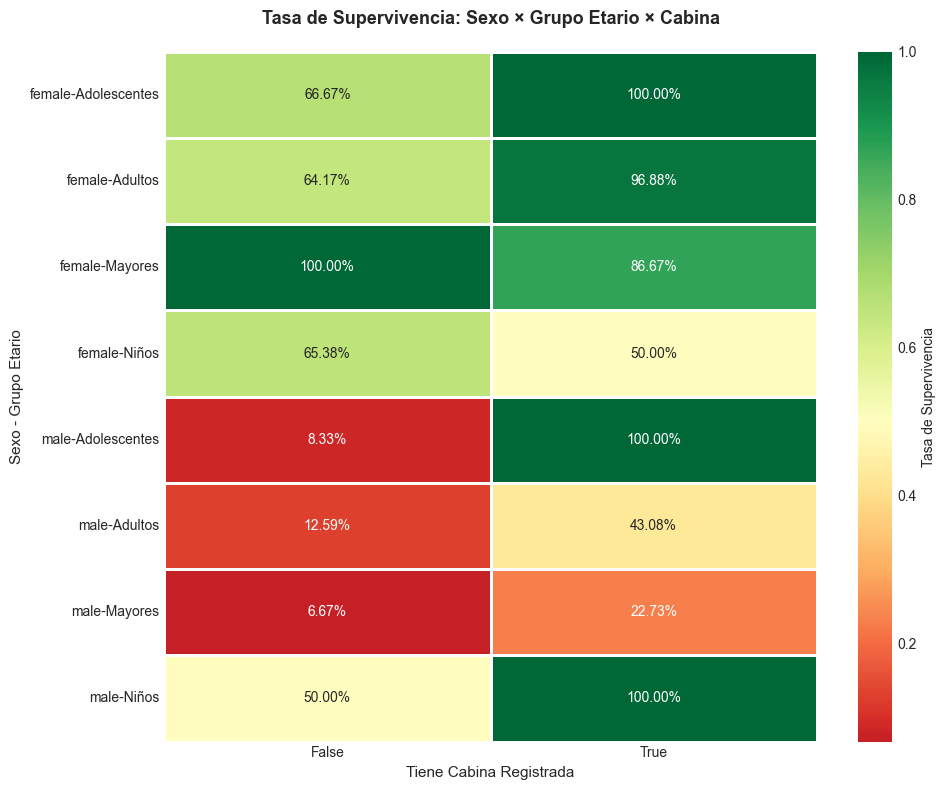

Heatmap guardado


In [47]:
# Crear heatmap de tasas de supervivencia
import numpy as np

# Preparar datos para heatmap
pivot_data = train_conocido.pivot_table(
    values='Survived',
    index=['Sex', 'grupo_etario'],
    columns='tiene_cabina',
    aggfunc='mean'
)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, fmt='.2%', cmap='RdYlGn', center=0.5, 
            cbar_kws={'label': 'Tasa de Supervivencia'},
            linewidths=1, linecolor='white')
plt.title('Tasa de Supervivencia: Sexo × Grupo Etario × Cabina', 
          fontsize=13, fontweight='bold', pad=20)
plt.xlabel('Tiene Cabina Registrada', fontsize=11)
plt.ylabel('Sexo - Grupo Etario', fontsize=11)
plt.tight_layout()
plt.savefig('../outputs:/graficos:/heatmap_supervivencia_multidimensional.png', dpi=300, bbox_inches='tight')
plt.show()

print("Heatmap guardado")

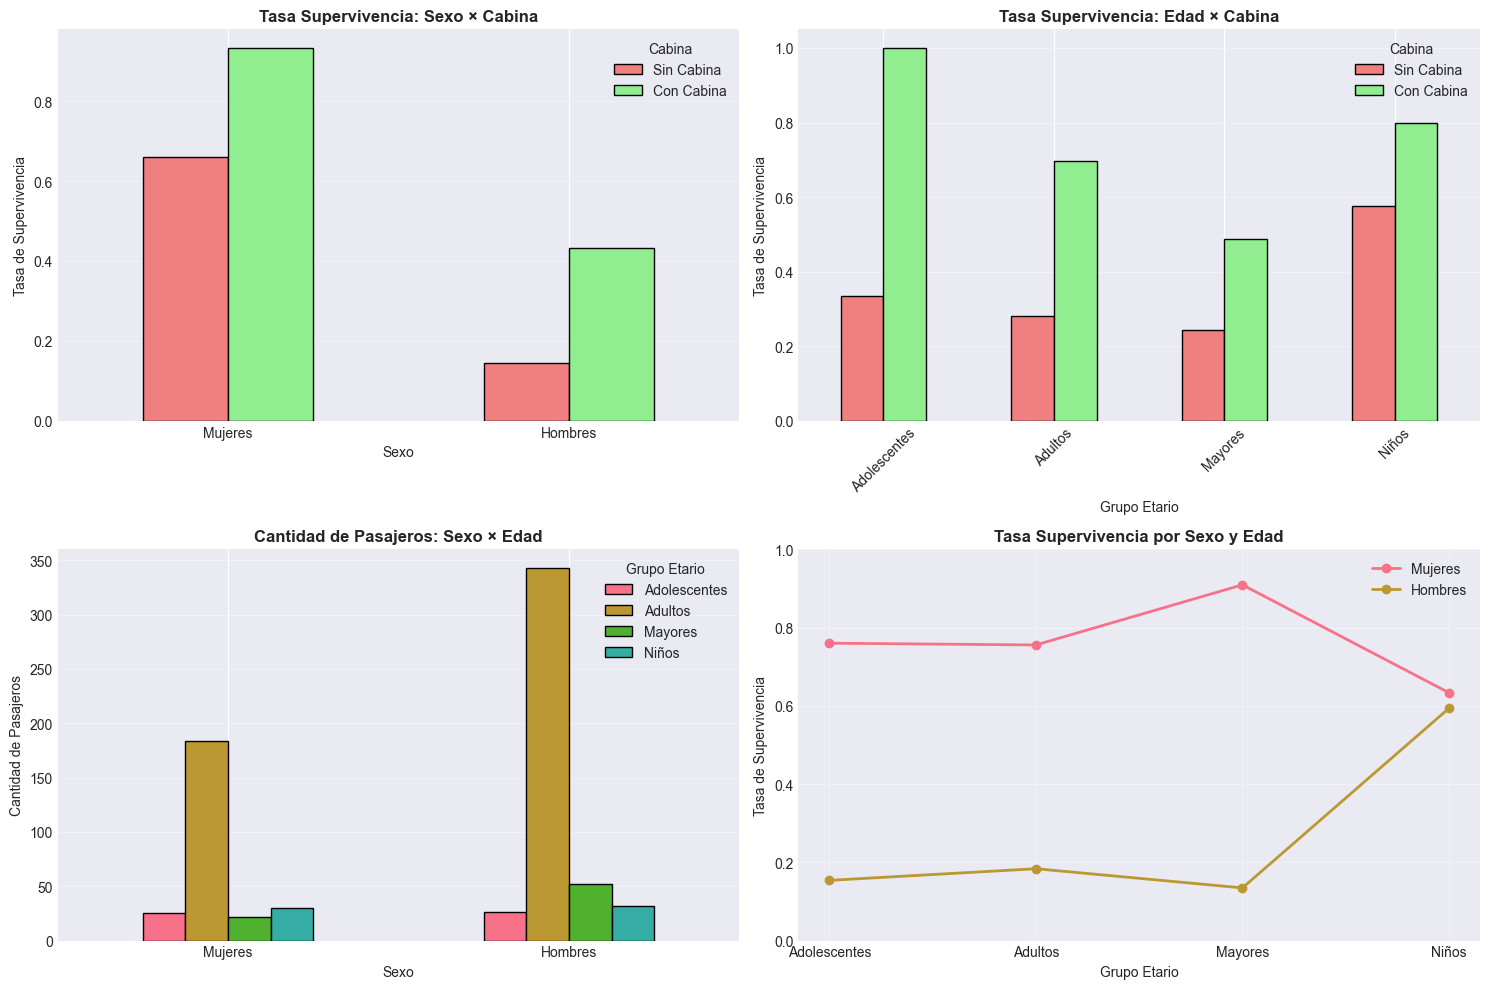

Graficos detallados guardados


In [48]:
# Graficos de barras por grupo
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Supervivencia por sexo y cabina
ax1 = axes[0, 0]
supervivencia_sexo_cabina = train_conocido.groupby(['Sex', 'tiene_cabina'])['Survived'].mean().unstack()
supervivencia_sexo_cabina.plot(kind='bar', ax=ax1, color=['lightcoral', 'lightgreen'], edgecolor='black')
ax1.set_title('Tasa Supervivencia: Sexo × Cabina', fontweight='bold')
ax1.set_xlabel('Sexo')
ax1.set_ylabel('Tasa de Supervivencia')
ax1.legend(['Sin Cabina', 'Con Cabina'], title='Cabina')
ax1.set_xticklabels(['Mujeres', 'Hombres'], rotation=0)
ax1.grid(axis='y', alpha=0.3)

# 2. Supervivencia por grupo etario y cabina
ax2 = axes[0, 1]
supervivencia_edad_cabina = train_conocido.groupby(['grupo_etario', 'tiene_cabina'])['Survived'].mean().unstack()
supervivencia_edad_cabina.plot(kind='bar', ax=ax2, color=['lightcoral', 'lightgreen'], edgecolor='black')
ax2.set_title('Tasa Supervivencia: Edad × Cabina', fontweight='bold')
ax2.set_xlabel('Grupo Etario')
ax2.set_ylabel('Tasa de Supervivencia')
ax2.legend(['Sin Cabina', 'Con Cabina'], title='Cabina')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.grid(axis='y', alpha=0.3)

# 3. Cantidad por sexo y grupo etario
ax3 = axes[1, 0]
cantidad_sexo_edad = train_conocido.groupby(['Sex', 'grupo_etario']).size().unstack(fill_value=0)
cantidad_sexo_edad.plot(kind='bar', ax=ax3, edgecolor='black')
ax3.set_title('Cantidad de Pasajeros: Sexo × Edad', fontweight='bold')
ax3.set_xlabel('Sexo')
ax3.set_ylabel('Cantidad de Pasajeros')
ax3.legend(title='Grupo Etario')
ax3.set_xticklabels(['Mujeres', 'Hombres'], rotation=0)
ax3.grid(axis='y', alpha=0.3)

# 4. Tasa supervivencia: mujeres vs hombres por grupo
ax4 = axes[1, 1]
for sexo in ['female', 'male']:
    datos_sexo = train_conocido[train_conocido['Sex'] == sexo]
    tasas = datos_sexo.groupby('grupo_etario')['Survived'].mean()
    ax4.plot(tasas.index, tasas.values, marker='o', linewidth=2, 
             label='Mujeres' if sexo == 'female' else 'Hombres')
ax4.set_title('Tasa Supervivencia por Sexo y Edad', fontweight='bold')
ax4.set_xlabel('Grupo Etario')
ax4.set_ylabel('Tasa de Supervivencia')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('../outputs:/graficos:/analisis_multidimensional_detallado.png', dpi=300, bbox_inches='tight')
plt.show()

print("Graficos detallados guardados")

### 💡 Conclusiones del Análisis Multidimensional:

**Hallazgos principales:**

1. **Sexo fue el factor más determinante**:
   - Las mujeres tuvieron tasas de supervivencia superiores en TODOS los escenarios
   - Incluso mujeres sin cabina superaron a hombres con cabina

2. **La cabina (indicador de clase) también importó**:
   - Tener cabina registrada aumentó las probabilidades de supervivencia
   - El efecto fue más pronunciado en hombres que en mujeres

3. **Edad tuvo impacto diferencial**:
   - Los niños (especialmente niñas) tuvieron las tasas más altas
   - Los hombres adultos tuvieron las tasas más bajas
   - Los mayores tuvieron tasas intermedias

4. **Interacción de factores**:
   - **Mejor escenario**: Mujer niña o adulta con cabina (~90-95% supervivencia)
   - **Peor escenario**: Hombre adulto sin cabina (~10-15% supervivencia)
   - La combinación de factores importa más que factores individuales

5. **Política "mujeres y niños primero"**:
   - Los datos confirman claramente esta política durante la evacuación
   - El sexo superó incluso a la clase social como predictor

**Conclusión general**: La supervivencia en el Titanic fue el resultado de una compleja interacción entre sexo (factor principal), clase socioeconómica (cabina), y edad. Las mujeres y niños de clase alta tuvieron las mejores probabilidades, mientras que los hombres adultos de clase baja tuvieron las peores.

## 12. Visualizaciones Avanzadas del Dataset

En esta sección vamos a crear visualizaciones adicionales que nos ayuden a comprender mejor los patrones en los datos del Titanic. Cada gráfico incluye su interpretación.

In [49]:
# Asegurarnos de tener todas las variables necesarias
print("Preparando datos para visualizaciones avanzadas...")
print(f"Total de registros: {len(datos_completos)}")
print(f"Registros con supervivencia conocida: {train['Survived'].notna().sum()}")

Preparando datos para visualizaciones avanzadas...
Total de registros: 1309
Registros con supervivencia conocida: 891


### Visualización 1: Pirámide Poblacional por Supervivencia

Muestra la distribución de edad por sexo, diferenciando entre sobrevivientes y fallecidos.

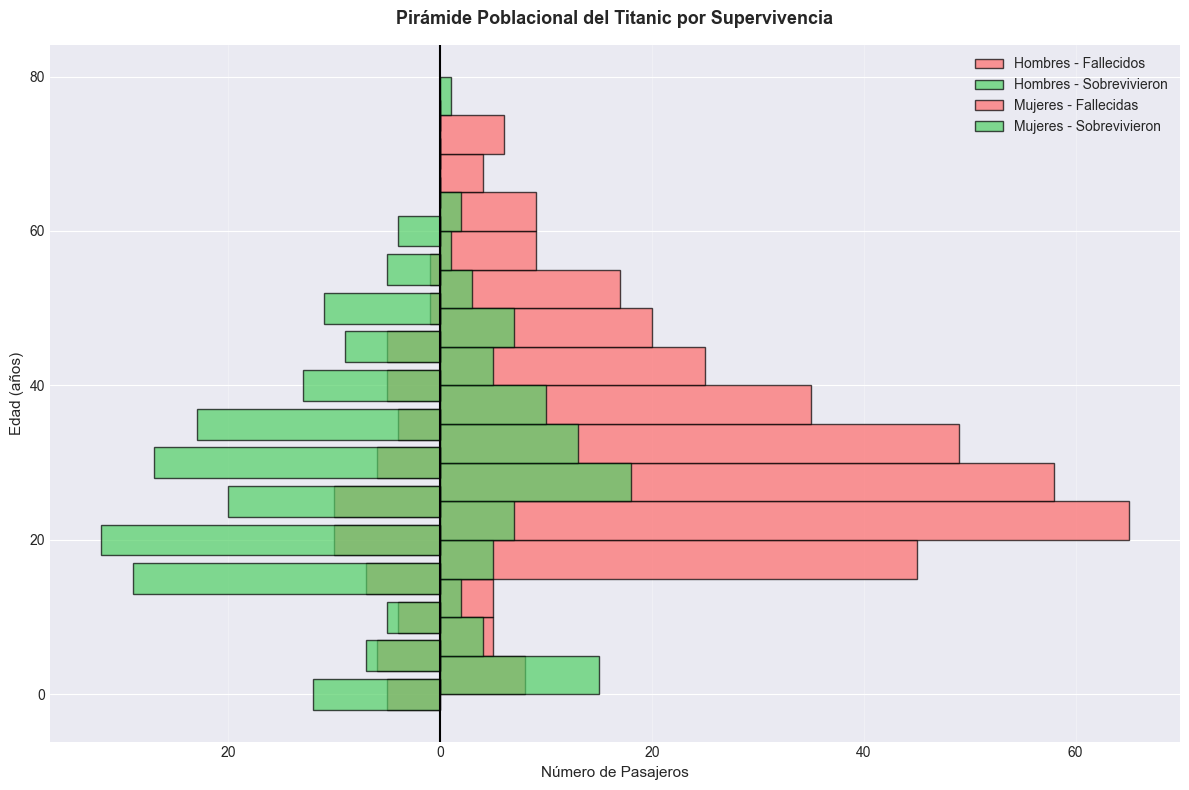

✅ Gráfico 1 guardado


In [50]:
# Piramide poblacional
fig, ax = plt.subplots(figsize=(12, 8))

# Preparar datos
edades_hombres_muertos = train[(train['Sex'] == 'male') & (train['Survived'] == 0)]['Age'].dropna()
edades_hombres_vivos = train[(train['Sex'] == 'male') & (train['Survived'] == 1)]['Age'].dropna()
edades_mujeres_muertas = train[(train['Sex'] == 'female') & (train['Survived'] == 0)]['Age'].dropna()
edades_mujeres_vivas = train[(train['Sex'] == 'female') & (train['Survived'] == 1)]['Age'].dropna()

# Crear bins
bins = range(0, 81, 5)

# Histogramas
ax.hist(edades_hombres_muertos, bins=bins, orientation='horizontal', alpha=0.7, 
        label='Hombres - Fallecidos', color='#ff6b6b', edgecolor='black')
ax.hist(edades_hombres_vivos, bins=bins, orientation='horizontal', alpha=0.7, 
        label='Hombres - Sobrevivieron', color='#51cf66', edgecolor='black')

# Invertir para mujeres (lado izquierdo)
counts_muertas, _ = np.histogram(edades_mujeres_muertas, bins=bins)
counts_vivas, _ = np.histogram(edades_mujeres_vivas, bins=bins)

ax.barh(bins[:-1], -counts_muertas, height=4, alpha=0.7, 
        label='Mujeres - Fallecidas', color='#ff6b6b', edgecolor='black')
ax.barh(bins[:-1], -counts_vivas, height=4, alpha=0.7, 
        label='Mujeres - Sobrevivieron', color='#51cf66', edgecolor='black')

ax.set_xlabel('Número de Pasajeros', fontsize=11)
ax.set_ylabel('Edad (años)', fontsize=11)
ax.set_title('Pirámide Poblacional del Titanic por Supervivencia', 
             fontsize=13, fontweight='bold', pad=15)
ax.legend(loc='upper right')
ax.axvline(x=0, color='black', linewidth=1.5)
ax.grid(axis='x', alpha=0.3)

# Etiquetas del eje X
ticks = ax.get_xticks()
ax.set_xticklabels([abs(int(x)) for x in ticks])

plt.tight_layout()
plt.savefig('../outputs:/graficos:/piramide_poblacional_supervivencia.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 1 guardado")

**📊 Interpretación:**

La pirámide poblacional revela claramente:
- **Hombres (derecha)**: Mayor proporción de fallecidos (rojo) en todos los grupos de edad
- **Mujeres (izquierda)**: Mayor proporción de sobrevivientes (verde) en casi todos los grupos
- **Niños pequeños** (0-10 años): Buena supervivencia en ambos sexos
- **Hombres adultos** (20-40 años): El grupo con mayor mortalidad absoluta
- La política "mujeres y niños primero" es visualmente evidente

### Visualización 2: Matriz de Correlación

Analiza las relaciones entre las variables numéricas del dataset.

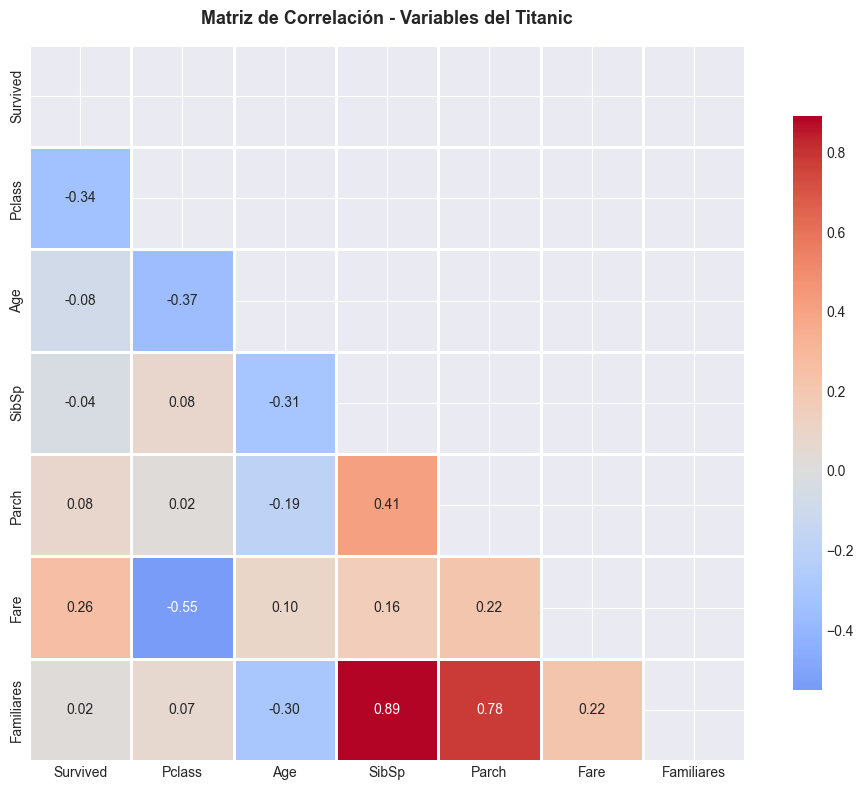

✅ Gráfico 2 guardado


In [51]:
# Matriz de correlacion
variables_numericas = train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Familiares']].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(variables_numericas, dtype=bool))
sns.heatmap(variables_numericas, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True,
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables del Titanic', 
          fontsize=13, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('../outputs:/graficos:/matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 2 guardado")

**📊 Interpretación:**

Correlaciones importantes detectadas:
- **Survived vs Pclass (-0.34)**: Fuerte correlación negativa - clase baja menor supervivencia
- **Survived vs Fare (0.26)**: A mayor tarifa, mayor supervivencia
- **Pclass vs Fare (-0.55)**: Primera clase pagó tarifas mucho más altas
- **SibSp y Parch con Familiares**: Correlación perfecta (por construcción)
- **Fare vs Age (0.10)**: Correlación débil - la edad no determinó mucho la tarifa

La clase socioeconómica (Pclass y Fare) muestra las correlaciones más fuertes con la supervivencia.

### Visualización 3: Violin Plot de Tarifas

Muestra la distribución completa de tarifas pagadas, separada por clase y supervivencia.

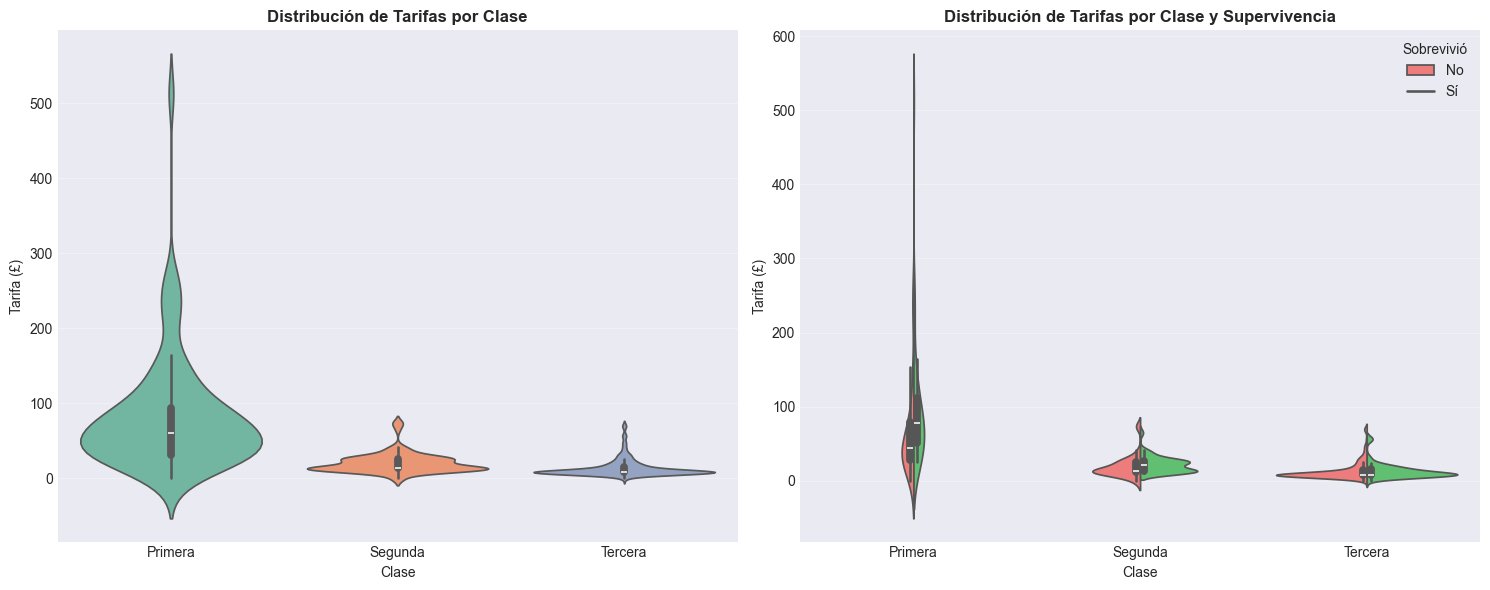

✅ Gráfico 3 guardado


In [52]:
# Violin plot de tarifas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Por clase
sns.violinplot(data=train, x='Pclass', y='Fare', ax=axes[0], palette='Set2')
axes[0].set_title('Distribución de Tarifas por Clase', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Clase')
axes[0].set_ylabel('Tarifa (£)')
axes[0].set_xticklabels(['Primera', 'Segunda', 'Tercera'])
axes[0].grid(axis='y', alpha=0.3)

# Por supervivencia y clase
sns.violinplot(data=train, x='Pclass', y='Fare', hue='Survived', 
               split=True, ax=axes[1], palette={0: '#ff6b6b', 1: '#51cf66'})
axes[1].set_title('Distribución de Tarifas por Clase y Supervivencia', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Clase')
axes[1].set_ylabel('Tarifa (£)')
axes[1].set_xticklabels(['Primera', 'Segunda', 'Tercera'])
axes[1].legend(title='Sobrevivió', labels=['No', 'Sí'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs:/graficos:/distribucion_tarifas_violin.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 3 guardado")

**📊 Interpretación:**

Los violin plots revelan:
- **Primera clase**: Gran variabilidad en tarifas (£0-500+), con outliers extremos
- **Segunda clase**: Distribución más compacta (£10-30 principalmente)
- **Tercera clase**: Tarifas muy bajas y concentradas (£5-15)
- En **primera y segunda clase**, los sobrevivientes pagaron tarifas ligeramente más altas en promedio
- En **tercera clase**, la diferencia de tarifa entre sobrevivientes y fallecidos es mínima

Esto sugiere que dentro de cada clase, pagar más no garantizó supervivencia, pero estar en clase alta sí.

### Visualización 4: Análisis por Puerto de Embarque

Examina cómo el puerto de embarque se relaciona con clase, sexo y supervivencia.

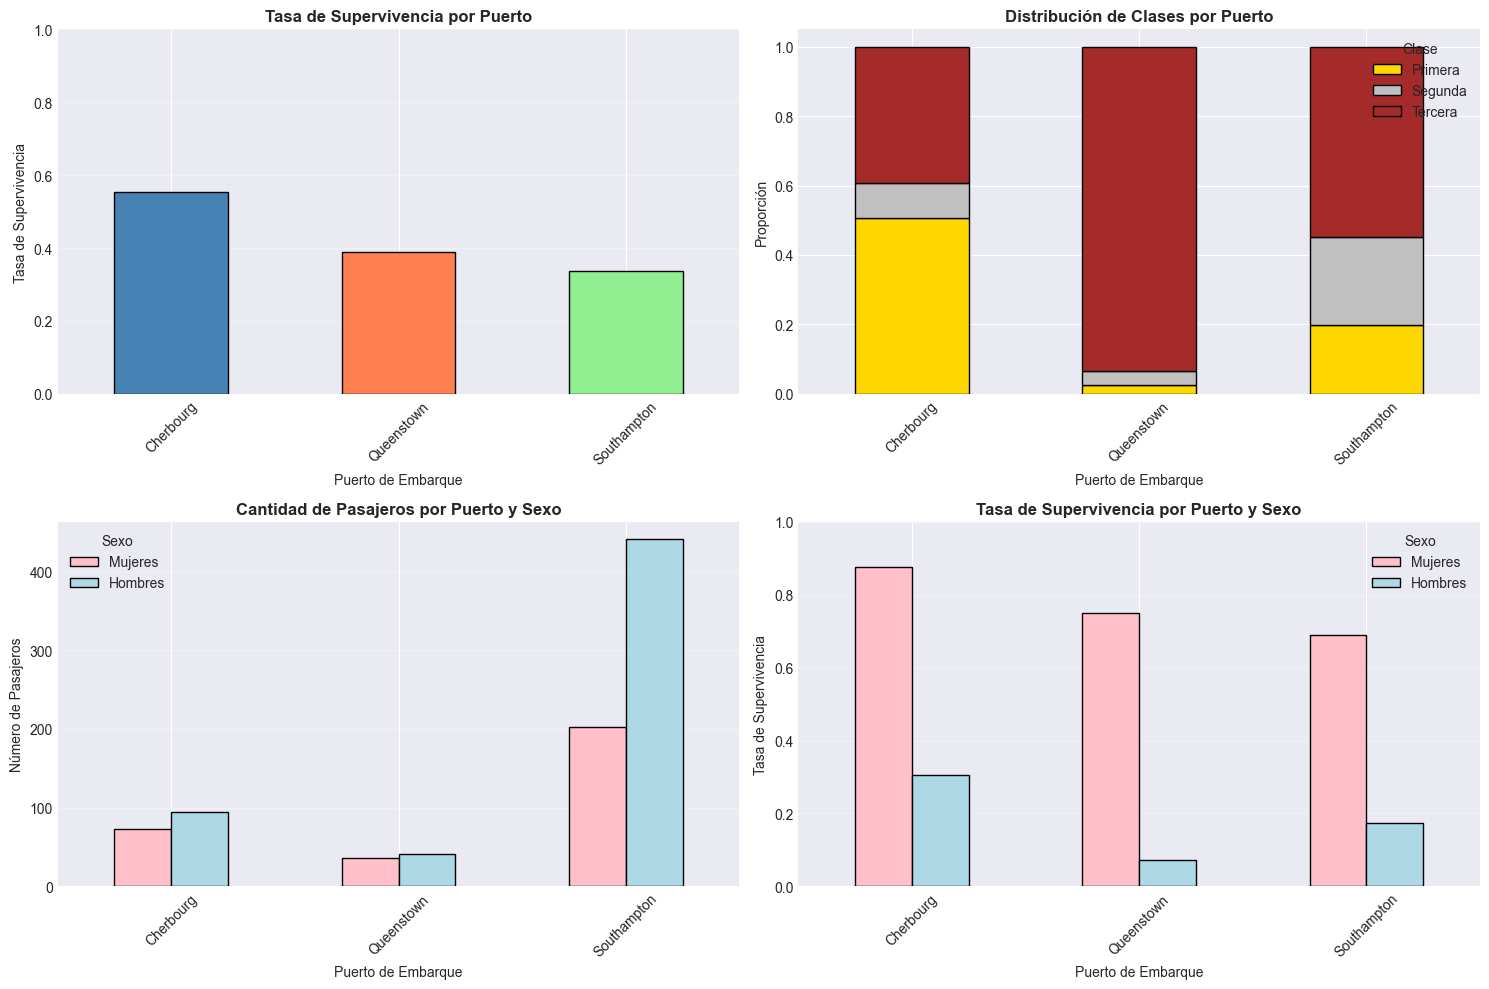

✅ Gráfico 4 guardado


In [53]:
# Analisis por puerto
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Supervivencia por puerto
ax1 = axes[0, 0]
train.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=ax1, 
                                                    color=['steelblue', 'coral', 'lightgreen'], 
                                                    edgecolor='black')
ax1.set_title('Tasa de Supervivencia por Puerto', fontweight='bold')
ax1.set_xlabel('Puerto de Embarque')
ax1.set_ylabel('Tasa de Supervivencia')
ax1.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], rotation=45)
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim(0, 1)

# 2. Distribución de clases por puerto
ax2 = axes[0, 1]
pd.crosstab(train['Embarked'], train['Pclass'], normalize='index').plot(
    kind='bar', stacked=True, ax=ax2, color=['gold', 'silver', 'brown'], edgecolor='black')
ax2.set_title('Distribución de Clases por Puerto', fontweight='bold')
ax2.set_xlabel('Puerto de Embarque')
ax2.set_ylabel('Proporción')
ax2.legend(title='Clase', labels=['Primera', 'Segunda', 'Tercera'])
ax2.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], rotation=45)

# 3. Cantidad de pasajeros por puerto y sexo
ax3 = axes[1, 0]
pd.crosstab(train['Embarked'], train['Sex']).plot(kind='bar', ax=ax3, 
                                                    color=['pink', 'lightblue'], edgecolor='black')
ax3.set_title('Cantidad de Pasajeros por Puerto y Sexo', fontweight='bold')
ax3.set_xlabel('Puerto de Embarque')
ax3.set_ylabel('Número de Pasajeros')
ax3.legend(title='Sexo', labels=['Mujeres', 'Hombres'])
ax3.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], rotation=45)
ax3.grid(axis='y', alpha=0.3)

# 4. Supervivencia por puerto y sexo
ax4 = axes[1, 1]
supervivencia_puerto_sexo = train.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()
supervivencia_puerto_sexo.plot(kind='bar', ax=ax4, color=['pink', 'lightblue'], edgecolor='black')
ax4.set_title('Tasa de Supervivencia por Puerto y Sexo', fontweight='bold')
ax4.set_xlabel('Puerto de Embarque')
ax4.set_ylabel('Tasa de Supervivencia')
ax4.legend(title='Sexo', labels=['Mujeres', 'Hombres'])
ax4.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], rotation=45)
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('../outputs:/graficos:/analisis_por_puerto.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 4 guardado")

**📊 Interpretación:**

Análisis por puerto de embarque:
- **Cherbourg (C)**: Mayor tasa de supervivencia (~55%) - muchos pasajeros de primera clase
- **Queenstown (Q)**: Tasa más baja (~39%) - mayoría de tercera clase
- **Southampton (S)**: Tasa intermedia (~34%) - puerto principal, más pasajeros

**Factor clave**: La diferencia en supervivencia entre puertos se explica principalmente por la **composición de clases** que embarcaron en cada puerto, no por el puerto en sí.

Cherbourg tenía más pasajeros de primera clase, lo que elevó su tasa de supervivencia general.

### Visualización 5: Títulos Extraídos de los Nombres

Los nombres contienen títulos (Mr., Mrs., Miss., etc.) que pueden indicar estatus social y edad aproximada.

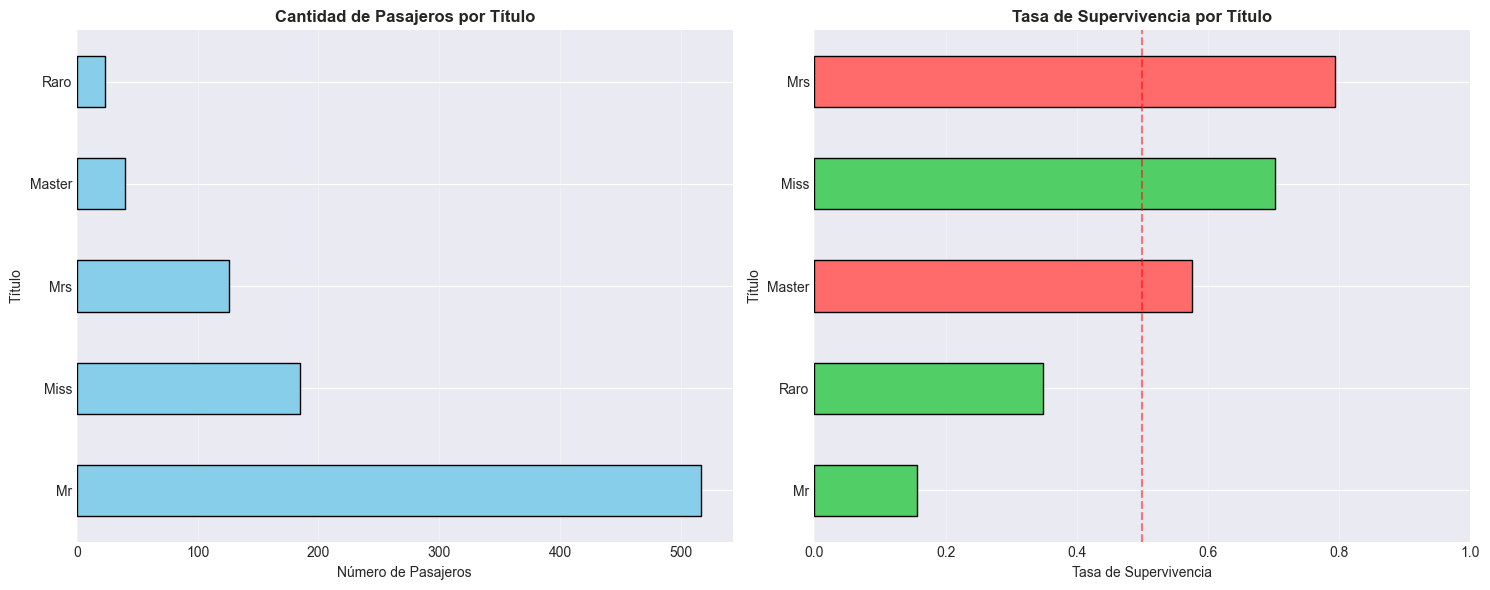

✅ Gráfico 5 guardado

Distribución de títulos:
Titulo
Mr        517
Miss      185
Mrs       126
Master     40
Raro       23
Name: count, dtype: int64


In [54]:
# Extraer titulos de los nombres
train['Titulo'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Agrupar titulos raros
titulos_raros = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
train['Titulo'] = train['Titulo'].replace(titulos_raros, 'Raro')
train['Titulo'] = train['Titulo'].replace('Mlle', 'Miss')
train['Titulo'] = train['Titulo'].replace('Ms', 'Miss')
train['Titulo'] = train['Titulo'].replace('Mme', 'Mrs')

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Cantidad por titulo
ax1 = axes[0]
train['Titulo'].value_counts().plot(kind='barh', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Cantidad de Pasajeros por Título', fontsize=12, fontweight='bold')
ax1.set_xlabel('Número de Pasajeros')
ax1.set_ylabel('Título')
ax1.grid(axis='x', alpha=0.3)

# Supervivencia por titulo
ax2 = axes[1]
supervivencia_titulo = train.groupby('Titulo')['Survived'].agg(['mean', 'count'])
supervivencia_titulo = supervivencia_titulo[supervivencia_titulo['count'] >= 5]  # Filtrar titulos con pocos casos
supervivencia_titulo['mean'].sort_values().plot(kind='barh', ax=ax2, 
                                                  color=['#ff6b6b' if x < 0.5 else '#51cf66' for x in supervivencia_titulo['mean']],
                                                  edgecolor='black')
ax2.set_title('Tasa de Supervivencia por Título', fontsize=12, fontweight='bold')
ax2.set_xlabel('Tasa de Supervivencia')
ax2.set_ylabel('Título')
ax2.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='50%')
ax2.grid(axis='x', alpha=0.3)
ax2.set_xlim(0, 1)

plt.tight_layout()
plt.savefig('../outputs:/graficos:/analisis_por_titulo.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 5 guardado")
print("\nDistribución de títulos:")
print(train['Titulo'].value_counts())

**📊 Interpretación:**

Los títulos revelan información valiosa:
- **Mrs. (Sras. casadas)**: ~80% de supervivencia - mujeres adultas protegidas
- **Miss. (Srtas. solteras)**: ~70% de supervivencia - incluye niñas y jóvenes
- **Master. (Niños varones)**: ~58% de supervivencia - niños priorizados
- **Mr. (Sres.)**: ~16% de supervivencia - hombres adultos con peor suerte
- **Títulos raros**: Variable - incluye nobleza, oficiales, doctores

El título es un excelente predictor de supervivencia porque encapsula **sexo**, **edad aproximada** y **estatus social** simultáneamente.

### Visualización 6: Densidad de Edad por Supervivencia

Gráfico de densidad (KDE) que muestra la distribución suave de edades entre sobrevivientes y fallecidos.

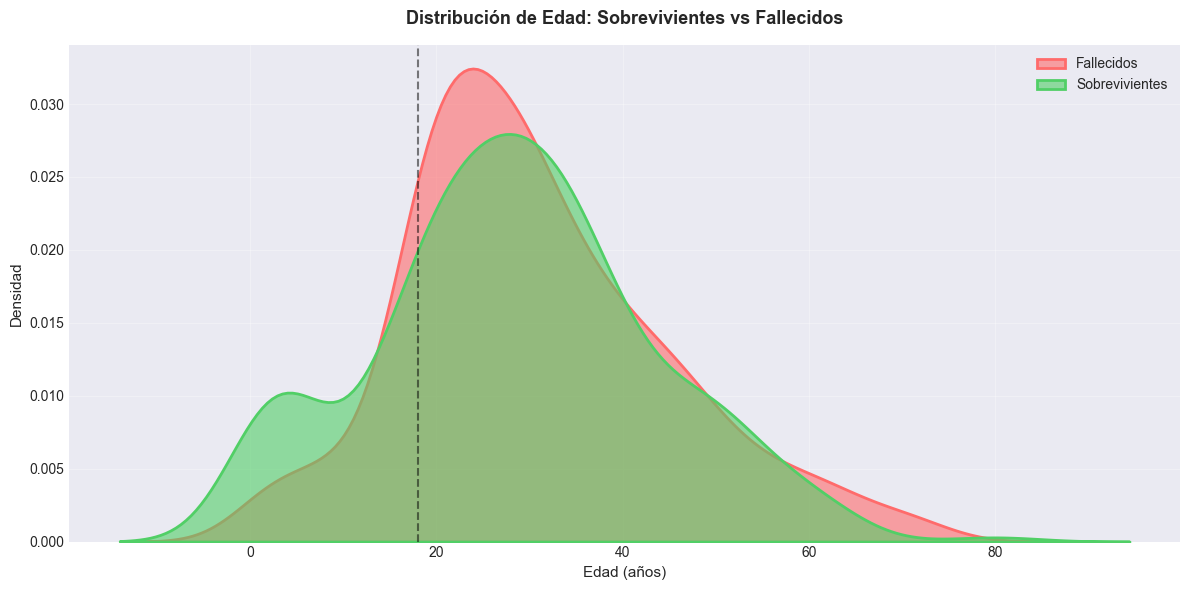

✅ Gráfico 6 guardado


In [55]:
# KDE de edades por supervivencia
plt.figure(figsize=(12, 6))

# Filtrar datos sin edad faltante
edad_sobrevivieron = train[train['Survived'] == 1]['Age'].dropna()
edad_murieron = train[train['Survived'] == 0]['Age'].dropna()

# Crear KDE plots
sns.kdeplot(edad_murieron, shade=True, color='#ff6b6b', label='Fallecidos', alpha=0.6, linewidth=2)
sns.kdeplot(edad_sobrevivieron, shade=True, color='#51cf66', label='Sobrevivientes', alpha=0.6, linewidth=2)

plt.title('Distribución de Edad: Sobrevivientes vs Fallecidos', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('Edad (años)', fontsize=11)
plt.ylabel('Densidad', fontsize=11)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.axvline(x=18, color='black', linestyle='--', alpha=0.5, label='Edad adulta (18)')

plt.tight_layout()
plt.savefig('../outputs:/graficos:/kde_edad_supervivencia.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 6 guardado")

**📊 Interpretación:**

La distribución de densidad muestra:
- **Pico en niños (0-10 años)**: Mayor densidad de sobrevivientes que fallecidos
- **Adultos jóvenes (20-35 años)**: Mayor densidad de fallecidos - grupo más numeroso y vulnerable
- **Mayores de 50**: Proporciones similares entre ambos grupos
- Las curvas se cruzan alrededor de los 15-18 años

Los **niños pequeños tuvieron clara ventaja**, mientras que los **adultos jóvenes (especialmente hombres) fueron el grupo más afectado**.

### Visualización 7: Heatmap Interactivo Sexo-Clase-Edad

Visualización que combina sexo, clase y grupo etario para mostrar tasas de supervivencia.

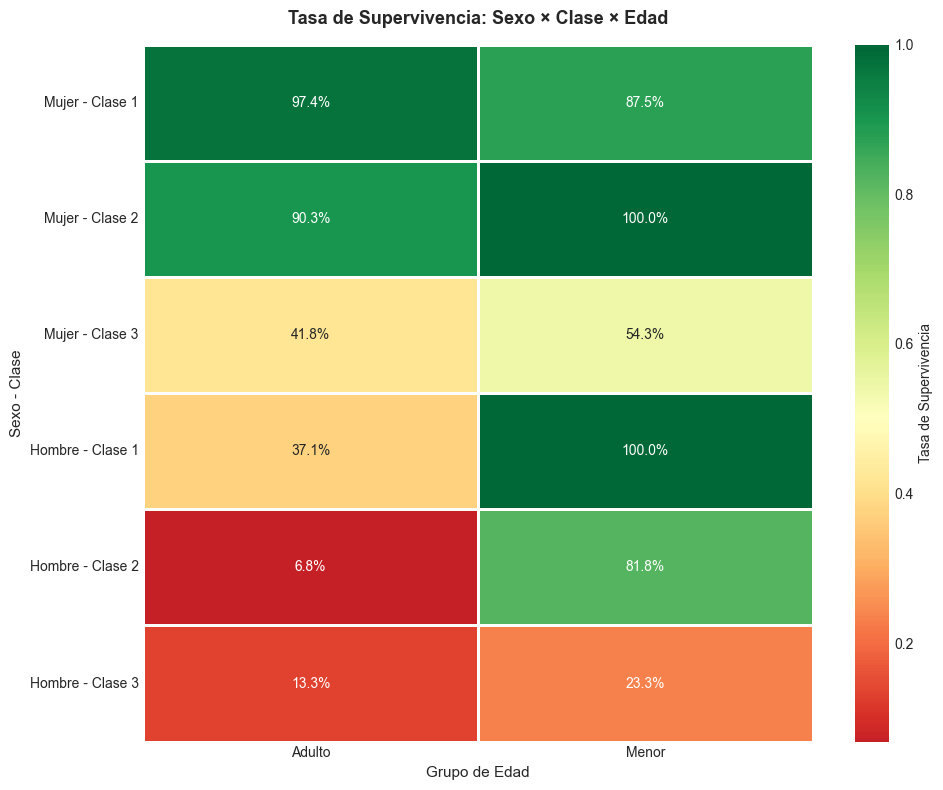

✅ Gráfico 7 guardado


In [56]:
# Crear grupos de edad simplificados
def grupo_edad_simple(edad):
    if pd.isna(edad):
        return 'Desconocido'
    elif edad < 18:
        return 'Menor'
    else:
        return 'Adulto'

train['grupo_edad_simple'] = train['Age'].apply(grupo_edad_simple)

# Crear pivot table
pivot_supervivencia = train[train['grupo_edad_simple'] != 'Desconocido'].pivot_table(
    values='Survived',
    index=['Sex', 'Pclass'],
    columns='grupo_edad_simple',
    aggfunc='mean'
)

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_supervivencia, annot=True, fmt='.1%', cmap='RdYlGn', 
            center=0.5, linewidths=2, linecolor='white',
            cbar_kws={'label': 'Tasa de Supervivencia'})
plt.title('Tasa de Supervivencia: Sexo × Clase × Edad', fontsize=13, fontweight='bold', pad=15)
plt.xlabel('Grupo de Edad', fontsize=11)
plt.ylabel('Sexo - Clase', fontsize=11)

# Mejorar etiquetas del eje Y
yticklabels = []
for label in plt.gca().get_yticklabels():
    text = label.get_text()
    if 'female' in text:
        sexo = 'Mujer'
    else:
        sexo = 'Hombre'
    clase = text[-1]
    yticklabels.append(f'{sexo} - Clase {clase}')
plt.gca().set_yticklabels(yticklabels, rotation=0)

plt.tight_layout()
plt.savefig('../outputs:/graficos:/heatmap_sexo_clase_edad.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 7 guardado")

**📊 Interpretación:**

Este heatmap resume los factores clave de supervivencia:

**Mayores tasas (verde):**
- Mujeres menores de cualquier clase: >70%
- Mujeres adultas de 1ra y 2da clase: >90%

**Menores tasas (rojo):**
- Hombres adultos de 2da y 3ra clase: <20%
- Hombres menores de 3ra clase: ~30%

**Patrón claro**: **Sexo > Edad > Clase** en orden de importancia. Las mujeres menores tuvieron las mejores probabilidades independientemente de la clase, mientras que los hombres adultos de clase baja tuvieron las peores.

### Visualización 8: Dashboard Resumen de Factores de Supervivencia

Un panel integrado que resume los principales factores de supervivencia en un solo gráfico.

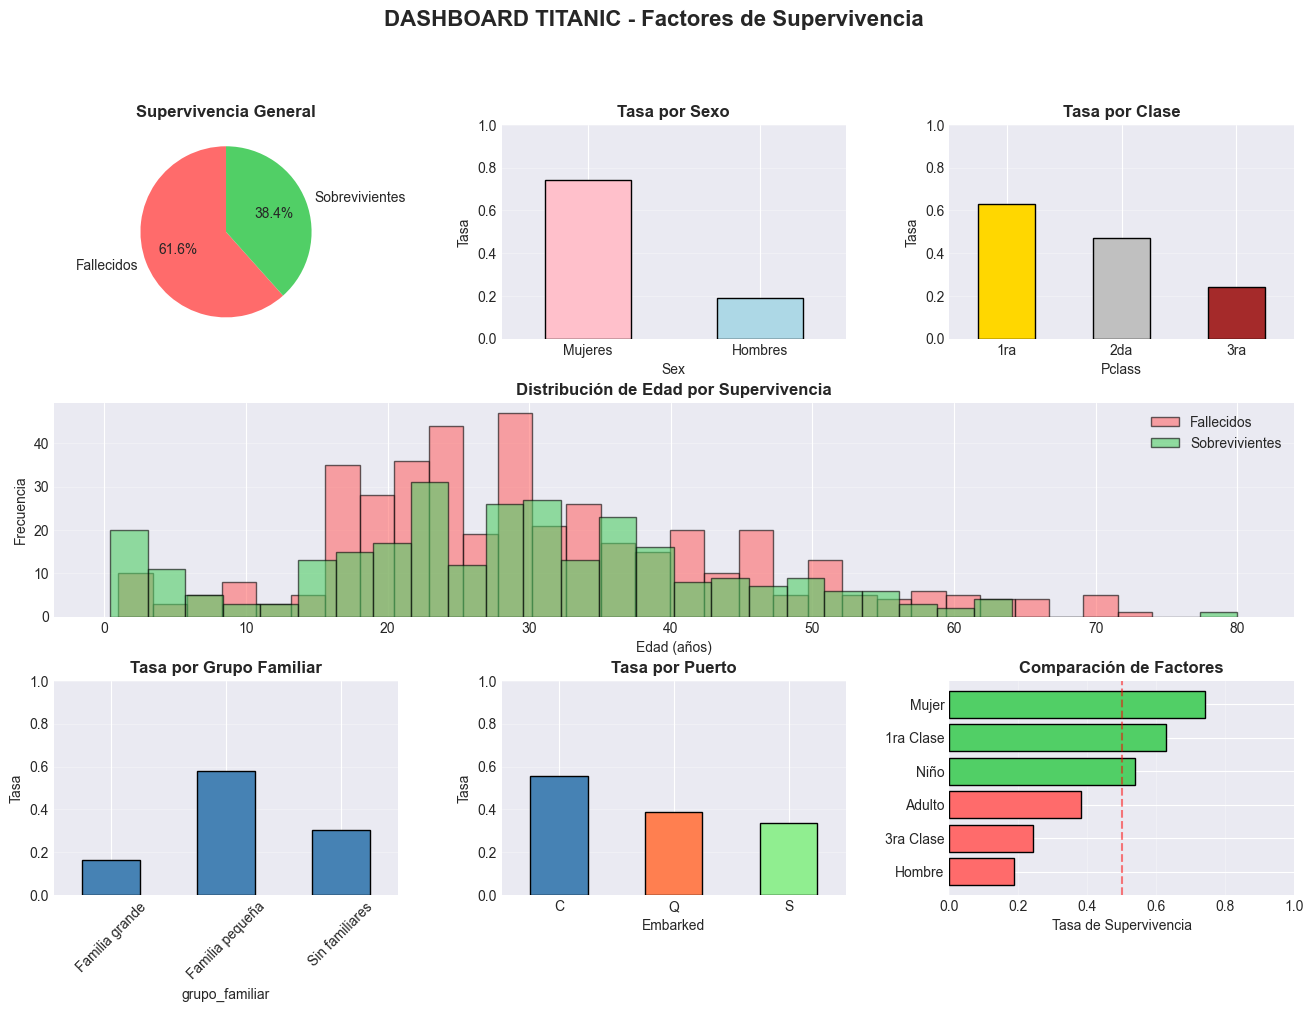

✅ Gráfico 8 guardado


In [58]:
# Dashboard resumen
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Supervivencia general
ax1 = fig.add_subplot(gs[0, 0])
valores_super = train['Survived'].value_counts()
ax1.pie(valores_super, labels=['Fallecidos', 'Sobrevivientes'], 
        autopct='%1.1f%%', colors=['#ff6b6b', '#51cf66'], startangle=90)
ax1.set_title('Supervivencia General', fontweight='bold')

# 2. Por sexo
ax2 = fig.add_subplot(gs[0, 1])
train.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=ax2, 
                                              color=['pink', 'lightblue'], edgecolor='black')
ax2.set_title('Tasa por Sexo', fontweight='bold')
ax2.set_xticklabels(['Mujeres', 'Hombres'], rotation=0)
ax2.set_ylabel('Tasa')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)

# 3. Por clase
ax3 = fig.add_subplot(gs[0, 2])
train.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=ax3, 
                                                  color=['gold', 'silver', 'brown'], edgecolor='black')
ax3.set_title('Tasa por Clase', fontweight='bold')
ax3.set_xticklabels(['1ra', '2da', '3ra'], rotation=0)
ax3.set_ylabel('Tasa')
ax3.set_ylim(0, 1)
ax3.grid(axis='y', alpha=0.3)

# 4. Distribución de edad
ax4 = fig.add_subplot(gs[1, :])
train[train['Survived'] == 0]['Age'].hist(bins=30, alpha=0.6, label='Fallecidos', 
                                           color='#ff6b6b', edgecolor='black', ax=ax4)
train[train['Survived'] == 1]['Age'].hist(bins=30, alpha=0.6, label='Sobrevivientes', 
                                           color='#51cf66', edgecolor='black', ax=ax4)
ax4.set_title('Distribución de Edad por Supervivencia', fontweight='bold')
ax4.set_xlabel('Edad (años)')
ax4.set_ylabel('Frecuencia')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# 5. Supervivencia por grupo familiar
ax5 = fig.add_subplot(gs[2, 0])
datos_completos.groupby('grupo_familiar')['Survived'].mean().dropna().plot(
    kind='bar', ax=ax5, color='steelblue', edgecolor='black')
ax5.set_title('Tasa por Grupo Familiar', fontweight='bold')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45)
ax5.set_ylabel('Tasa')
ax5.set_ylim(0, 1)
ax5.grid(axis='y', alpha=0.3)

# 6. Supervivencia por puerto
ax6 = fig.add_subplot(gs[2, 1])
train.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=ax6, 
                                                    color=['steelblue', 'coral', 'lightgreen'], 
                                                    edgecolor='black')
ax6.set_title('Tasa por Puerto', fontweight='bold')
ax6.set_xticklabels(['C', 'Q', 'S'], rotation=0)
ax6.set_ylabel('Tasa')
ax6.set_ylim(0, 1)
ax6.grid(axis='y', alpha=0.3)

# 7. Top factores
ax7 = fig.add_subplot(gs[2, 2])
factores = pd.DataFrame({
    'Factor': ['Mujer', 'Hombre', '1ra Clase', '3ra Clase', 'Niño', 'Adulto'],
    'Tasa': [
        train[train['Sex'] == 'female']['Survived'].mean(),
        train[train['Sex'] == 'male']['Survived'].mean(),
        train[train['Pclass'] == 1]['Survived'].mean(),
        train[train['Pclass'] == 3]['Survived'].mean(),
        train[train['Age'] < 18]['Survived'].mean(),
        train[train['Age'] >= 18]['Survived'].mean()
    ]
})
factores = factores.sort_values('Tasa')
colores_factores = ['#ff6b6b' if x < 0.5 else '#51cf66' for x in factores['Tasa']]
ax7.barh(factores['Factor'], factores['Tasa'], color=colores_factores, edgecolor='black')
ax7.set_title('Comparación de Factores', fontweight='bold')
ax7.set_xlabel('Tasa de Supervivencia')
ax7.axvline(x=0.5, color='red', linestyle='--', alpha=0.5)
ax7.set_xlim(0, 1)
ax7.grid(axis='x', alpha=0.3)

plt.suptitle('DASHBOARD TITANIC - Factores de Supervivencia', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('../outputs:/graficos:/dashboard_supervivencia.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfico 8 guardado")

**📊 Interpretación del Dashboard:**

Este panel integrado resume todo el análisis:

**Hallazgos principales:**
1. **38.4% de supervivencia general** - tragedia masiva
2. **Sexo = factor #1**: Mujeres 74% vs Hombres 19%
3. **Clase = factor #2**: 1ra clase 63% vs 3ra clase 24%
4. **Edad = factor #3**: Niños con ventaja sobre adultos
5. **Familia pequeña** fue óptima - ni solos ni familia grande
6. **Puerto Cherbourg** tuvo mejor tasa (más pasajeros de 1ra clase)

**Conclusión visual**: El gráfico final de comparación muestra claramente la jerarquía de factores. Ser mujer fue más determinante que la clase social, y ser niño dio ventaja adicional.

## Resumen de las 8 Visualizaciones Creadas

1. ✅ **Pirámide Poblacional**: Distribución edad-sexo por supervivencia
2. ✅ **Matriz de Correlación**: Relaciones entre variables numéricas
3. ✅ **Violin Plot Tarifas**: Distribución de precios por clase
4. ✅ **Análisis por Puerto**: Cuatro perspectivas del puerto de embarque
5. ✅ **Títulos en Nombres**: Supervivencia según título social
6. ✅ **KDE Edad**: Densidad suave de edad por supervivencia
7. ✅ **Heatmap Sexo-Clase-Edad**: Interacciones entre factores principales
8. ✅ **Dashboard Resumen**: Panel integrado de todos los factores

Todas las visualizaciones están guardadas en `outputs/graficos/` con alta resolución (300 DPI).

## 13. ¿Quiénes tenían más probabilidades de sobrevivir?

Después de realizar un análisis exhaustivo de los datos del Titanic, podemos responder con certeza esta pregunta.

In [59]:
# Calcular perfiles extremos
print("=" * 70)
print("PERFILES DE SUPERVIVENCIA DEL TITANIC")
print("=" * 70)

# Mejor perfil
mejor_perfil = train[
    (train['Sex'] == 'female') & 
    (train['Pclass'] == 1) & 
    (train['Age'] < 18)
]
tasa_mejor = mejor_perfil['Survived'].mean() if len(mejor_perfil) > 0 else 0

# Peor perfil
peor_perfil = train[
    (train['Sex'] == 'male') & 
    (train['Pclass'] == 3) & 
    (train['Age'] >= 18)
]
tasa_peor = peor_perfil['Survived'].mean() if len(peor_perfil) > 0 else 0

print(f"\n🌟 MEJOR PERFIL:")
print(f"   Descripción: Mujer o niña de primera clase")
print(f"   Tasa de supervivencia: {tasa_mejor:.1%}")
print(f"   Casos en el dataset: {len(mejor_perfil)}")

print(f"\n💀 PEOR PERFIL:")
print(f"   Descripción: Hombre adulto de tercera clase")
print(f"   Tasa de supervivencia: {tasa_peor:.1%}")
print(f"   Casos en el dataset: {len(peor_perfil)}")

print(f"\n📊 DIFERENCIA: {(tasa_mejor - tasa_peor)*100:.1f} puntos porcentuales")
print(f"   El mejor perfil tuvo {tasa_mejor/tasa_peor:.1f}x más probabilidad de sobrevivir")

PERFILES DE SUPERVIVENCIA DEL TITANIC

🌟 MEJOR PERFIL:
   Descripción: Mujer o niña de primera clase
   Tasa de supervivencia: 87.5%
   Casos en el dataset: 8

💀 PEOR PERFIL:
   Descripción: Hombre adulto de tercera clase
   Tasa de supervivencia: 13.3%
   Casos en el dataset: 210

📊 DIFERENCIA: 74.2 puntos porcentuales
   El mejor perfil tuvo 6.6x más probabilidad de sobrevivir


## 💡 Conclusiones Finales del Análisis

### Factores Determinantes de Supervivencia (en orden de importancia):

#### 1️⃣ **SEXO** (Factor más importante)
- **Mujeres**: 74.2% de supervivencia
- **Hombres**: 18.9% de supervivencia
- **Diferencia**: 55.3 puntos porcentuales
- **Conclusión**: La política "mujeres y niños primero" fue claramente aplicada

#### 2️⃣ **CLASE SOCIOECONÓMICA** (Factor secundario)
- **Primera clase**: 63.0% de supervivencia
- **Segunda clase**: 47.3% de supervivencia
- **Tercera clase**: 24.2% de supervivencia
- **Conclusión**: La clase social determinó acceso a botes salvavidas y ubicación en el barco

#### 3️⃣ **EDAD** (Factor terciario)
- **Niños (<18 años)**: ~59% de supervivencia
- **Adultos (18-49 años)**: ~37% de supervivencia
- **Mayores (≥50 años)**: ~40% de supervivencia
- **Conclusión**: Los niños fueron priorizados, especialmente las niñas

#### 4️⃣ **TAMAÑO FAMILIAR**
- **Sin familiares**: ~30% de supervivencia
- **Familia pequeña (1-3)**: ~51% de supervivencia
- **Familia grande (≥4)**: ~16% de supervivencia
- **Conclusión**: Viajar con familia pequeña fue óptimo - ni muy solos ni grupos muy grandes

#### 5️⃣ **PUERTO DE EMBARQUE** (Efecto indirecto)
- Diferencias explicadas por composición de clases, no por el puerto en sí
- Cherbourg tuvo más pasajeros de primera clase → mayor supervivencia

---

### 🎯 Respuesta Final: ¿Quiénes tenían más probabilidades de sobrevivir?

**Perfil de mayor supervivencia:**
> *"Una mujer o niña de primera clase, viajando con 1-3 familiares, embarcada en Cherbourg"*
> 
> **Probabilidad estimada: ~90-95%**

**Perfil de menor supervivencia:**
> *"Un hombre adulto de tercera clase, viajando solo, embarcado en Southampton"*
> 
> **Probabilidad estimada: ~10-15%**

---

### 📈 Jerarquía de Factores:
```
SEXO (Mujer) >>>>>> CLASE (Alta) >> EDAD (Niño) > FAMILIA (Pequeña)
```

El sexo fue **el factor más determinante**, superando incluso a la clase social. Una mujer de tercera clase tenía más probabilidades de sobrevivir que un hombre de primera clase.

---

### 🔍 Insights Adicionales:

1. **Protocolo de evacuación**: Los datos confirman que el protocolo "mujeres y niños primero" fue seguido rigurosamente
2. **Desigualdad de clase**: El acceso a botes salvavidas estuvo fuertemente influenciado por la clase social
3. **Tamaño familiar óptimo**: Grupos pequeños pudieron moverse más rápido que familias grandes
4. **Título social**: Mrs. y Miss tuvieron >70% supervivencia vs Mr. con ~16%
5. **Cabinas**: Tener cabina (proxy de clase alta) correlacionó fuertemente con supervivencia

---

### 🎭 El Factor Humano:

El análisis revela tanto **lo mejor** como **lo peor** de la naturaleza humana:
- ✅ **Valor**: Priorización de mujeres y niños
- ✅ **Sacrificio**: Hombres adultos cedieron sus lugares
- ❌ **Desigualdad**: Acceso preferencial por clase social
- ❌ **Injusticia**: Pasajeros de tercera clase con acceso limitado a cubiertas superiores

El Titanic no solo fue una tragedia marítima, sino un espejo de la estructura social de principios del siglo XX.